# Summary

**TODO: Summarize.**

The **Congestion** scenario group is a series of simulations designed to help inform the specification of protocol parameters assumed to impact the block production in the Aztec ecosystem. The scenarios cover a variety of different environments for block production by varying the mode ("fixed" vs "dynamical") and duration of individual phases and gas prices incurred on Ethereum L1. Different combinations of protocol parameter values generate different simulation outcomes, that are summarized by key peformance indicators (KPIs). The KPIs are then assessed according to desired values (success criteria), using _threshold inequalities_ generated from threshold values for KPIs that meet stakeholder criteria.

As many relevant protocol parameters are currently undecided ("block reward", "costs", "fees", etc) and because an exhaustive 'sweep' of every possible combination of relevant protocol parameters is computationally infeasible, this study has instead performed an **adaptive search**, whereby a coarse initial grid of parameters is successively refined by applying the success criteria to generated KPIs, and inferring a new 'direction' of search for a succeeding grid. Convergence is achieved when all success criteria are met across the performed simulations. Although it is always possible that multiple "equilibria" exist, such that success criteria are met by parameter combinations that are not found from adaptive search, the initial grid is informed by existing parameter values from the Aztec network and hence benefit from the expert knowledge used to define those initial values. 

Future work can perform a more thorough search of the underlying parameter space, in addition to performing more scenarios and "fixing" parameters or assumptions that are currently unknown.

# Contents

**TODO: Summarize. **


**Experimental Setup**: This covers the objective of the study and its methodology, describes the KPIs and success indicators (threshold inequalities), the protocol and environmental sweep parameters and their initial ranges, and finally summarizes the computational complexity of the simulations themselves.

**Adaptive Grid Results**: The evolution of the parameter selection process is presented as a visualization, showing the convergence of the protocol parameter ranges as different success criteria are achieved.

**Protocol Parameter Recommendations**: Based upon the adaptive grid results, the recommended parameter ranges are presented.

**Decision Tree and Parameter Importance**: Using the adaptive grid results, a machine-learning process is applied to infer the importance of different parameters on the associated KPI-based threshold inequalities. This provides a method of assessing whether one or more parameters are 'crucial' to success, in the sense that they have an outsized impact on the success criteria. This approach leverages decision trees that are fit to the results of the entire adaptive grid process.

**Parameter Impact on KPIs**: A density approach (histogram) can be used to assess the impact of protocol parameters on the KPIs of the scenario. The KPI densities are shown for each protocol parameter sweep value, providing a visual indication of the impact of the parameter on the density shape and location.

**Conclusion**: An overall assessment of the scenario results is provided, highlighting any problems, caveats, implications and possibilities for future/extended work.

# Experimental Setup

**TODO: Experimental Setup.** 

## Objective and Methodology

The objective of the congestion scenario group is to the impact of phase durations on the viability to produce blocks consistently.

- **System Goals Targeted**:
  - G1: L1 Congestion Resilience
  - G2: Predictable & Fast Block Duration
  - G3: Predictable Returns
- **Design**: create different L1 state scenarios that impact block production
- **Testing Variables**:
  - Environmental:
      - Steady State (SS): "regular" L1 gas prices 
      - Congestion Shocks:
        - Intermittent Shock (IS): SS followed by shock, followed by SS, followed by Shock (shock comes in "waves")
        - Continuous Shock (CS): SS followed by continuous shock, followed by SS
  - Protocol:
      - Assess the impact of different `phase duration` values. `Phase duration` is measured in L1 blocks. The phase duration has an upper bound (UB) as well as a lower bound (defined as `Lower Bound per Upper Bound` (LBpUB), so that it is either 0 or 1). The UB value defines the maximum duration of the phase, while the LBpUB value lets us switch whether a phase is "fixed" or "dynamical". When min and max phase durations are equal (LBpUB = 1), the phase always ends only after the maximum duration passed and is "fixed" in time. When the min and max values are inequal (LBpUB = 0), the phase can end earlier if a conditional event happens (e.g.: A valid rollup proof is submitted, ending the `Proving Phase`) and is "dynamical" in time. 
      - Assess the impact of different `Block Reward` (BR) values. This is a direct reward to Sequencers and Provers, affecting their willingness to incur higher costs for gas.
      - Assess the impact of different `Commitment Bond` (CB) values. This bond is put up by Provers, leaving them at-risk if they do not perform their role. 
      - Assess the impact of different `XXX` (XXX) values. 

## KPIs

**TODO: Explain KPIs. Check numbering.**

- proportion_race_mode (KPI-1): This measures the proportion of race_mode to total blocks.
- proportion_slashed_prover (KPI-2): This measures the proportion of provers that were slashed (commitment bond).
- proportion_slashed_sequencer (KPI-3): This measures the proportion of provers that were slashed (stake).
- proportion_skipped (KPI-4): This measures the proportion of blocks that were skipped (no proposals, or no finalized proof).
- average_duration_finalized_blocks (KPI-5): This measures the average duration of succesfully finalized blocks.
- stddev_duration_finalized_blocks (KPI-6): This measures the standard deviation of the duration of succesfully finalized blocks.
- average_duration_nonfinalized_blocks (KPI-7): This measures the average duration of unfinalized blocks.
- stddev_duration_nonfinalized_blocks (KPI-8): This measures the standard deviation of the duration of succesfully finalized blocks.
- delta_total_revenue_agents (KPI-9): This measures the total revenue of agents. 

## Threshold Inequalities

**TODO: Delete or replace. Explain above median methodology.**

1. **Below Median across Trajectories (BMaT)**: Across all simulated trajectories, we want this KPI to be below the median value. (Lower is better) 
2. (**Larger than Median across Trajectories (LMaT**) Across all simulated trajectories, we want this KPI to be above the median value. (Higher is better)

## Sweep Parameters

**TODO: Revise. This can be copy-pasted from Markdown document. POKT information is below.**

### Swept Protocol Parameters

1. `ProposalPhaseUpperBound` (`PropUB`)
2. `CommitPhaseUpperBound` (`CUB`)
3. `RevealPhaseUpperBound` (`RUB`)
4. `ProvingPhaseUpperBound` (`ProvUB`)
5. `RaceModePhaseUpperBound` (`RaceUB`)
6. `CommitPhaseLowerBoundPerUpperBound` (`CLBpUB`)
7. `RevealPhaseLowerBoundPerUpperBound` (`RLBpUB`)
8. `ProvingPhaseLowerBoundPerUpperBound` (`ProvLBpUB`)
9. `RaceModePhaseLowerBoundPerUpperBound` (`RaceLBpUB`)
10. `BlockRewardConstant` (`BR`)
11. `CommitBondSize` (`CB`) 

### Swept Environmental Parameters

1. To simulate L1 congestion, we create a stochastic process to define a gas price on each timestep. This gas price serves as an evaluation for Sequencers and Provers on whether they deem it feasible to make an L1 transaction within the allotted time. 


## Initial Parameter Sweep Ranges

**TODO: Revise. POKT information is below.**

Protocol and Environmental parameters were initialized for the first adaptive grid search according to:
1. Values found in the specifications provided to BlockScience ([]())
2. Discussions with the Aztec team, and
3. BlockScience best practice. 

### Environmental Parameters

| Full Name |  Sweep Variable Name | Sweep Values | Units |
| --- | --- | ---| ---|
| Gas Price Threshold for transactions  | `gas_threshold_for_tx` |(50, 500, 5_000) | gas price |
| Blob Gas Price Threshold for DA  | `blob_gas_threshold_for_tx` | (50, 500, 5_000) | blob gas price |
| Likelihood of using marketplace (vs self-proving)  | `proving_marketplace_usage_probability` | (0, 0.5) | probability |

### Protocol Parameters

| Full Name |  Sweep Variable Name | Sweep Values | Units |
| --- | --- | ---| ---|
| `ProposalPhaseUpperBound`  | `phase_duration_proposal_max_blocks` | (3, 6, 12) | L1 blocks |
| `CommitPhaseUpperBound`       | `phase_duration_commit_bond_max_blocks` | (3, 6, 12) | L1 blocks |
| `RevealPhaseUpperBound`   | `phase_duration_reveal_max_blocks` | (3, 12, 24) | L1 blocks |
| `ProvingPhaseUpperBound`      | `phase_duration_rollup_max_blocks`  | (15, 40, 80) | L1 blocks |
| `RaceModePhaseUpperBound`  | `phase_duration_race_max_blocks`  | (3, 6)  | L1 blocks |
| `CommitPhaseLowerBoundPerUpperBound`  | `phase_duration_commit_bond_min_blocks`  | (0, 1)  | LBpUB |
| `RevealPhaseLowerBoundPerUpperBound`  | `phase_duration_reveal_min_blocks`  | (0, 1)  | LBpUB |
| `ProvingPhaseLowerBoundPerUpperBound`  | `phase_duration_rollup_min_blocks`  | (0, 1)  | LBpUB |
| `RaceModePhaseLowerBoundPerUpperBound`  | `phase_duration_race_min_blocks`  | (0, 1)  | LBpUB |
| `BlockRewardConstant`  | `reward_per_block`  | ($\{\pi_-, \pi+\}$)  | GWei |
| `CommitBondSize`  | `commit_bond_amount`  | $\{B_{s,-}, B_{s,+}\}$  | GWei |
| `Reward Share of Provers`  | `rewards_to_provers` | (0.0, 0.1, 0.5) | percentage of rewards |
| `Reward Share of Relays`  | `rewards_to_relay` | (0.0, 0.03, 0.1) | percentage of rewards |

## Computational Complexity

**TODO: Update.** 

**Total number of parameter constellations**: 

**Total number of Monte Carlo runs per constellation**: 

**Total number of experiments per adaptive grid**: 

**Number of adaptive grid searches**: 

**Total number of parameter constellations evaluated**: 

# Results

In [1]:
import os
os.chdir("..")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from aztec_gddt.metrics import *
from aztec_gddt.plot_tools import *     

In [3]:
FILENAME_TO_USE = "data/trajectory_tensor.csv.zip" # Replace with actual filename

In [4]:
# Cleaning data
base_df = add_additional_info(pd.read_csv(FILENAME_TO_USE))


# Protocol Parameter Recommendations

**TODO:** I don't think we are making parameter recommendations here? 

| Full Name |  Abbreviation | Recommended Range | Units |
| --- | --- | ---| ---|
| `XXX`| `xx_xx` | (x, y) | unit |

# Decision Tree and Parameter Importance

## Decision Tree Classification

**NOTE:** Might add additional prose. 

A decision tree is a machine-learning-based classifier. Given the simulation results, for each threshold inequality the tree recursively associates different _samples_ from the results, according to sorting criteria based upon one or more of the protocol parameters of the simulation. 

Each decision tree below corresponds to one of the threshold inequalities stated above. Where the decision tree is 'empty', the threshold inequality was either 1) always fulfilled during the simulations, or 2) never fulfilled during the simulations. In this case no sensitivity analysis can be performed, as the threshold inequalities do not vary according to the different parameter combinations that were swept.

The title of the decision tree includes the threshold inequality under scrutiny, in addition to a technical 'score' (usually "100%") and the number of simulation results used as the dataset. Within the decision tree presented, each **non-terminal** 'node' is labeled with the following information:

1. The sorting variable used and its cutoff value used for classification, in the form of `parameter_name <= x` where `x` is the cutoff value. Branches to the left of this node indicate _satisfaction_ of this inequality, while branches to the right indicate _violation_, i.e. `parameter_name > x`.
2. A Gini coefficient representing the method of recursive association used.
3. The total number of simulation results ("samples = y%") as a percentage "y" that are considered at this node.
4. The breakdown of the simulation results considered into left and right branches ("value = [p, 1-p]"), where "p" is the fraction of results that satisfy the `parameter_name <= x` constraint, and "1-p" the fraction satisfying `parameter_name > x`.
5. The classification of the majority of the simulation results at this node (note that this is not a final classification, as it appears in a non-terminal node, and can be arbitrary if the results are split equally across classes).

**Terminal** nodes ("leaves") represent the final classification of that proportion of the simulation results that arrive at the node, and have most of the same information as a non-terminal node, with the exception that there is no branching performed and hence no sorting variable displayed. Here the most important information is the classification (last line).

Non-terminal and terminal nodes colored in blue correspond to the threshold inequality being met, and by following blue boxes from a terminal node up to the root of tree a set of `parameter_name <= x` and/or `parameter_name > x` sorting criteria can be chained together. 

Upon successful classification, it is usual for the terminal node to have a breakdown "value = [1.0, 0.0]" or "value = [0.0, 1.0]", indicating that 100% of the remaining simulation results treated are either satisfying the threshold inequality under treatment (left value is 1.0), or not satisfying the threshold inequality (right value is 1.0).

For further information regarding the decision tree approach adopted here please see the [Decision Trees](https://scikit-learn.org/stable/modules/tree.html#) documentation for the scikit-learn library.

## Feature Importance

Below each non-empty decision tree is a bar graph indicating the relative importance of each swept protocol parameter ("feature") in determining the satisfaction of the threshold inequality. This leverages the use of "random forests", which is a technique to average over many different decision tree realizations over different subsets of the simulation results, assessing the relative contribution of each protocol parameter in the branching of each tree. Roughly speaking, the more times a protocol parameter was used in the branching process, the higher its importance is to the threshold inequality--in other words, the protocol parameter carries a larger 'weight' in determining satisfaction or violation of the inequality, and so the inequality is more sensitive to the values of the parameter.

For further information regarding the random forest and feature importance approach adopted here please see the [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) documentation from the `scikit-learn` library.

## Group 1 Tree Importance Plots

In [5]:
goal_name = "G1"
group_name = G1

final_G1_df = calculate_goal_score(grouped_df = base_df,
                    group = group_name,
                    new_column_name = f"{goal_name}_final_score" )

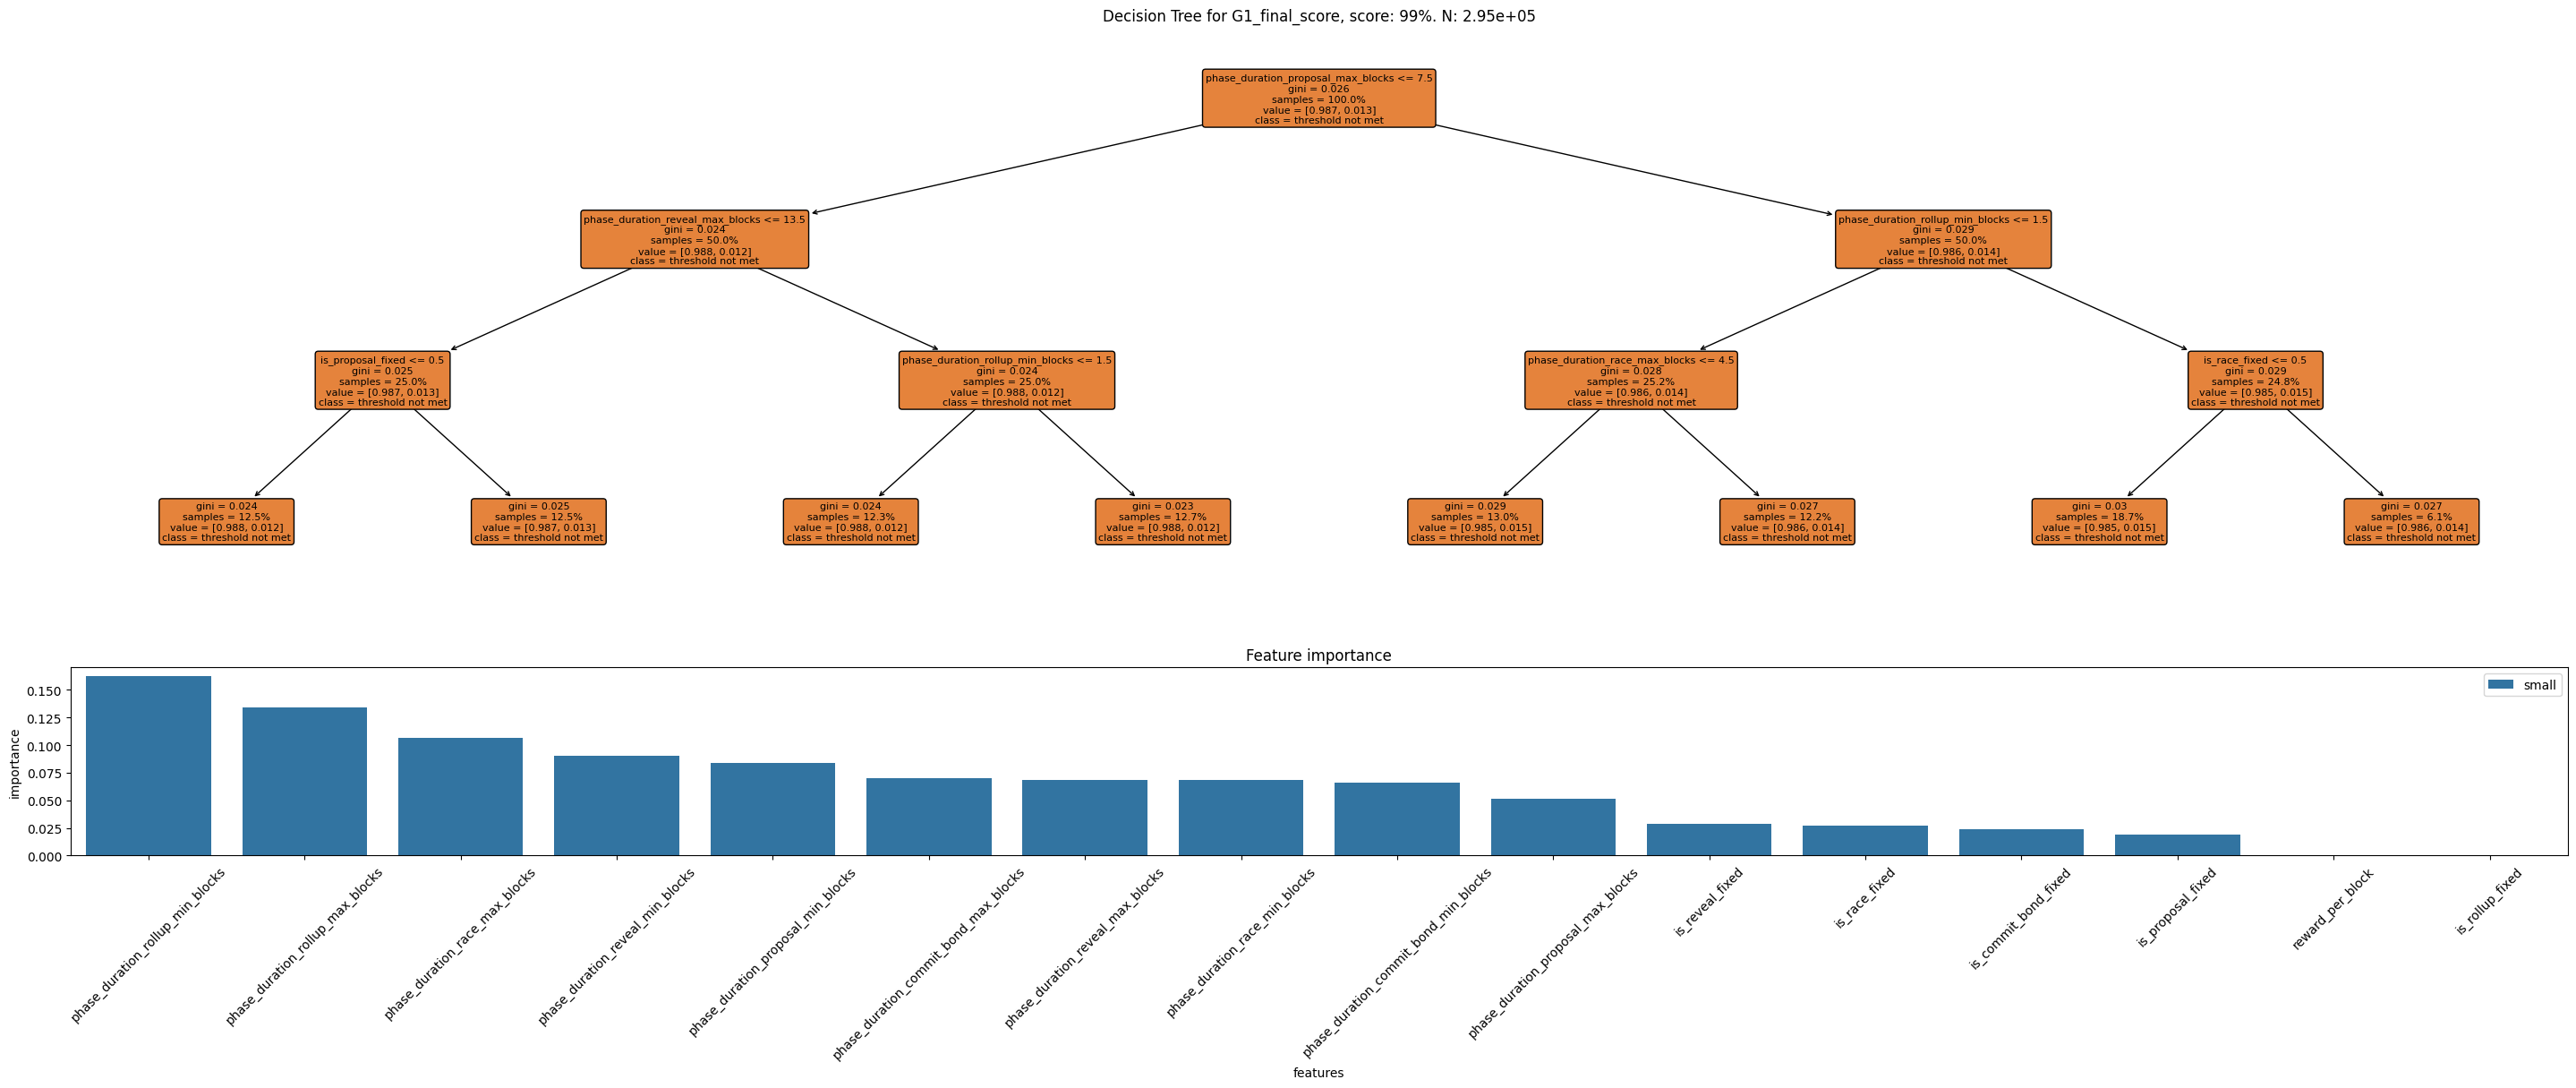

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for G1_final_score, score: 99%. N: 2.95e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [6]:
create_decision_tree_importances_plot(final_G1_df,
                                      col_name = "G1_final_score")


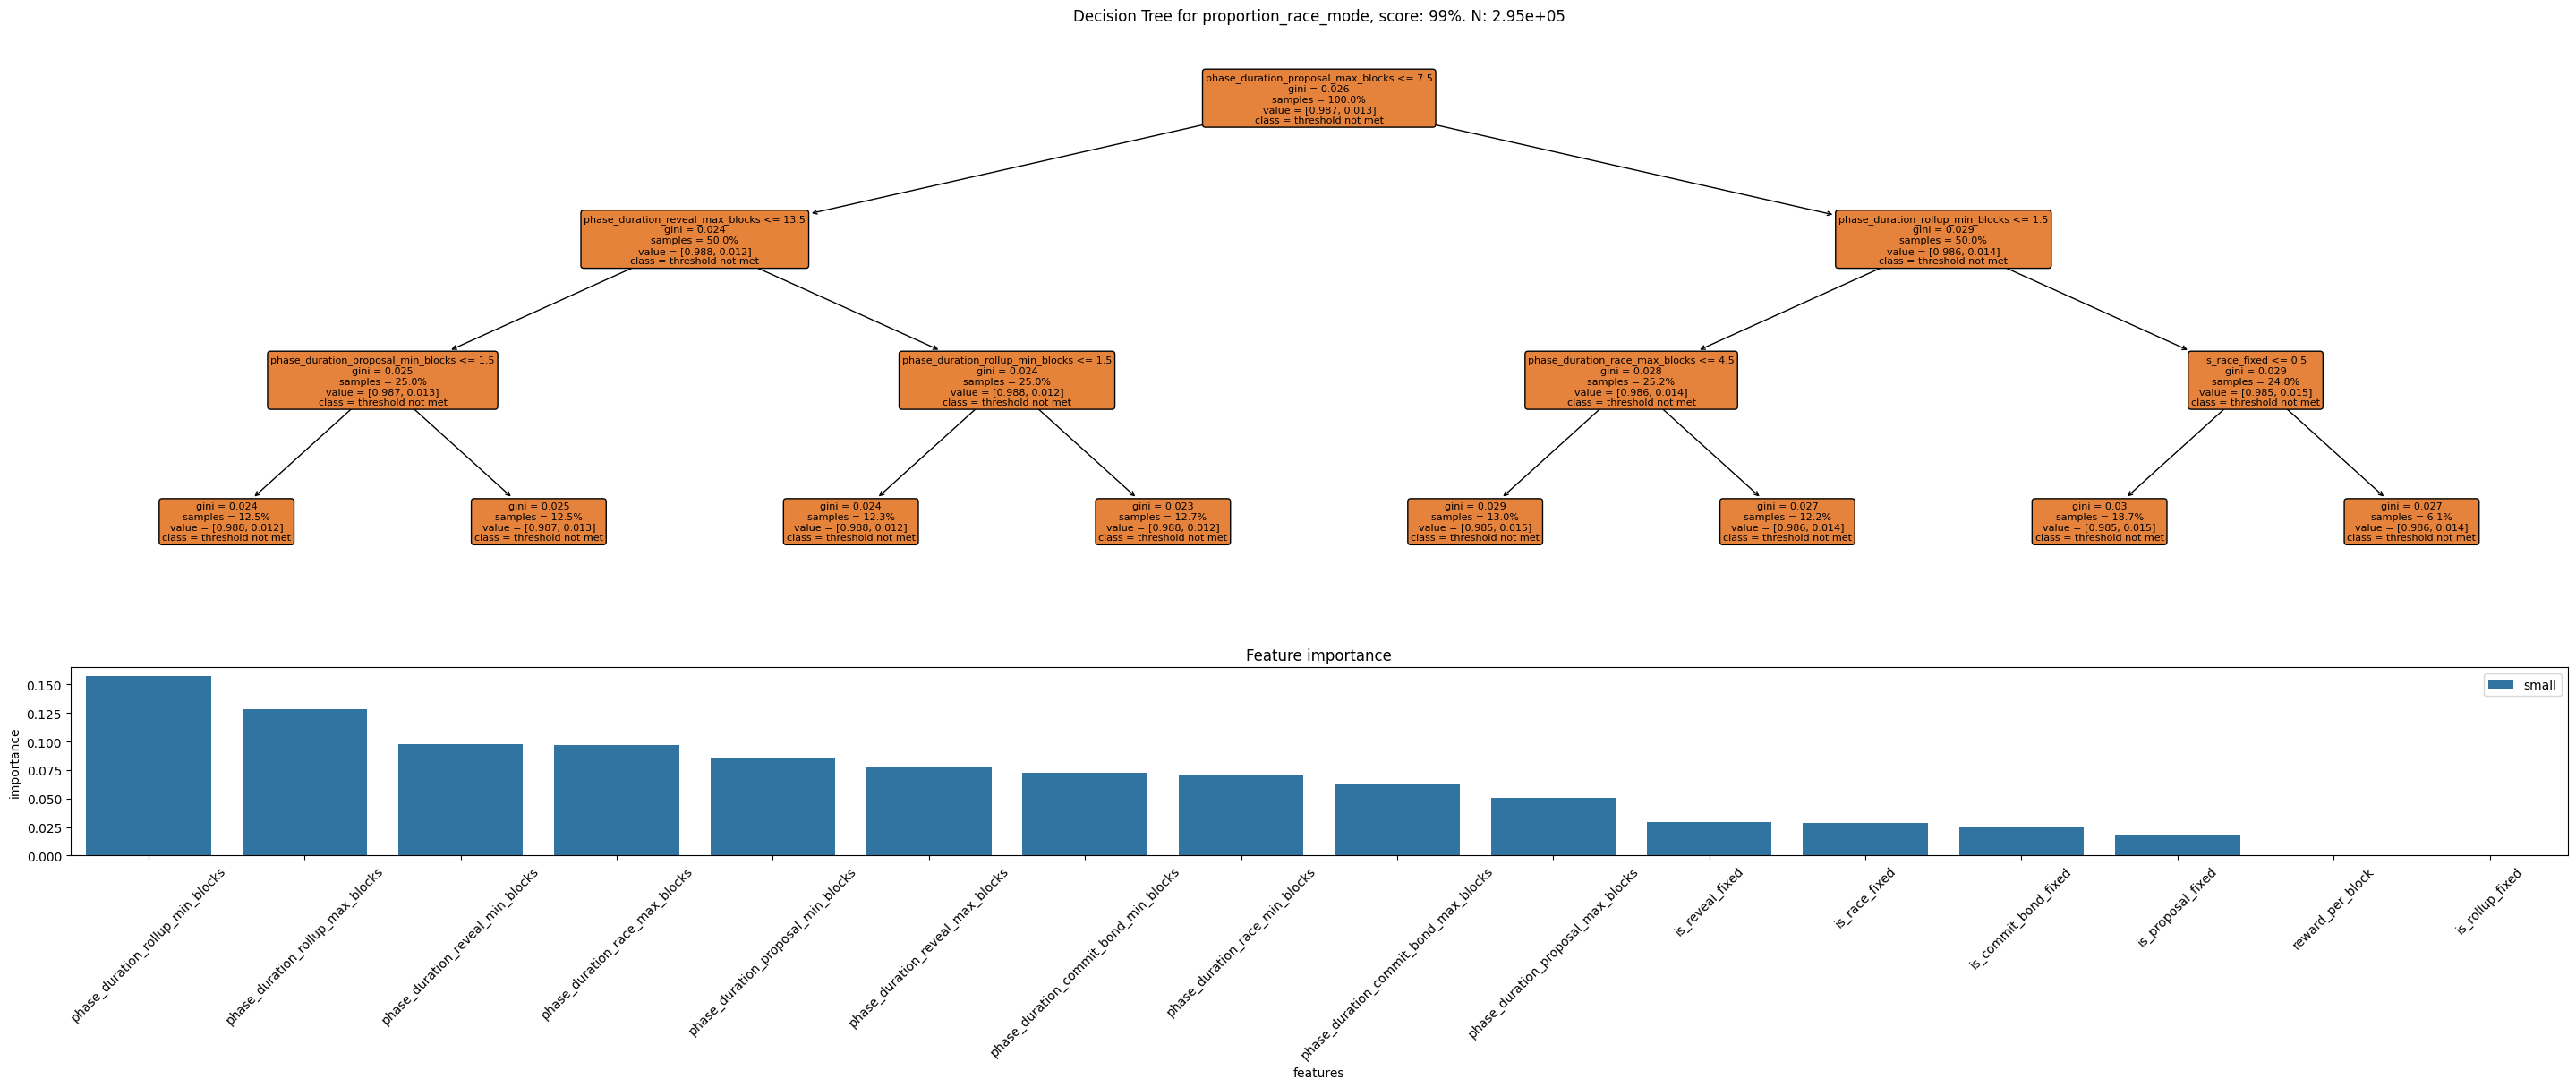

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for proportion_race_mode, score: 99%. N: 2.95e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [7]:
create_decision_tree_importances_plot(data = final_G1_df,
                                      col_name = "proportion_race_mode")

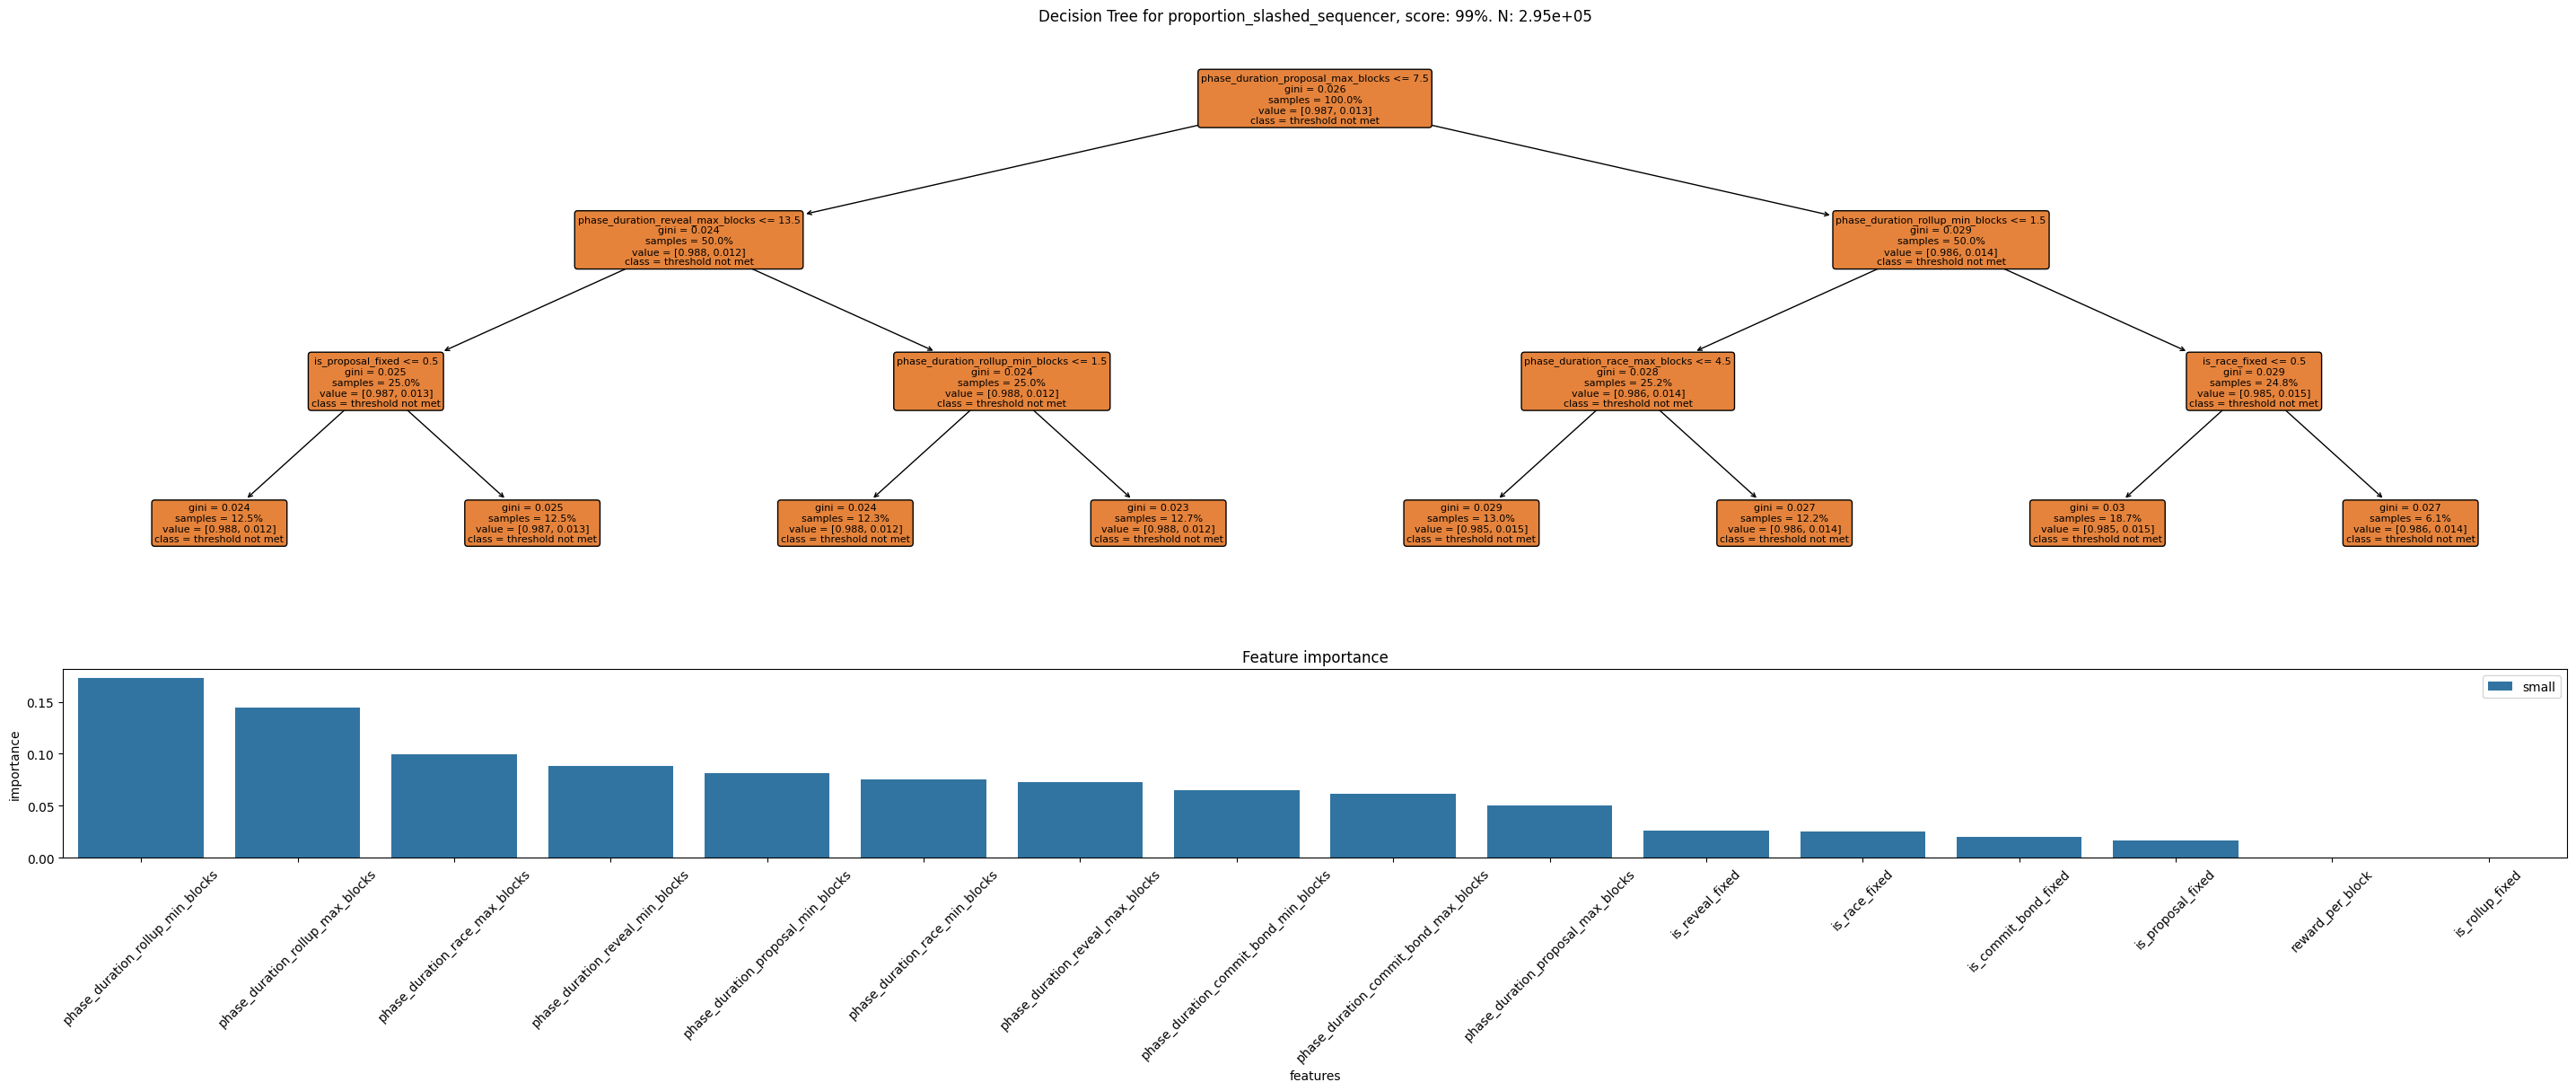

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for proportion_slashed_sequencer, score: 99%. N: 2.95e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [8]:
create_decision_tree_importances_plot(data = final_G1_df,
                                      col_name = "proportion_slashed_sequencer")

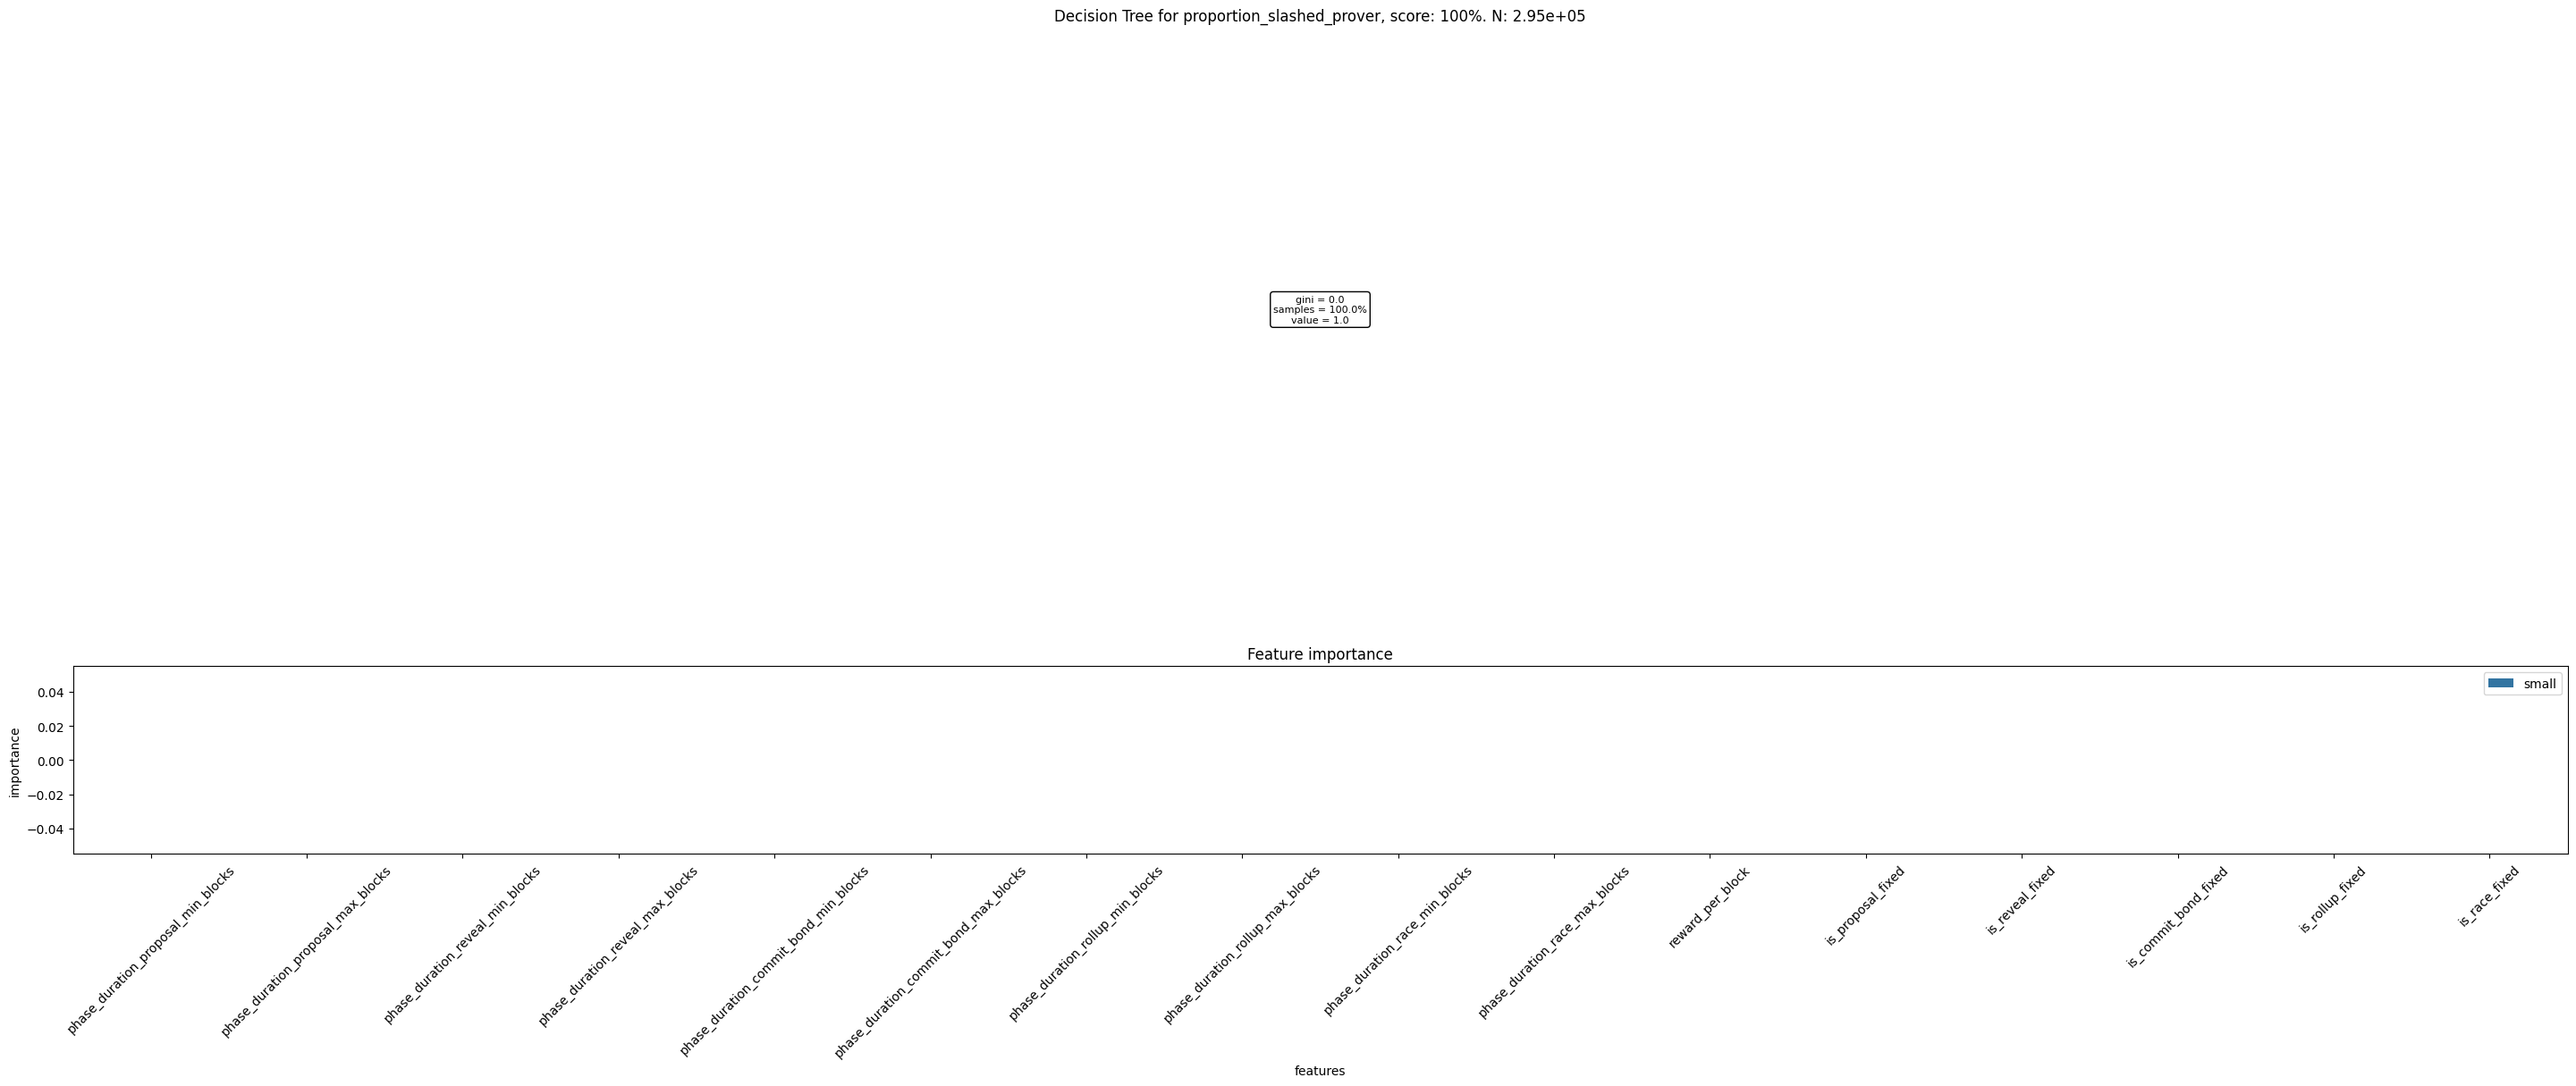

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for proportion_slashed_prover, score: 100%. N: 2.95e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [9]:
create_decision_tree_importances_plot(data = final_G1_df,
                                      col_name = "proportion_slashed_prover")

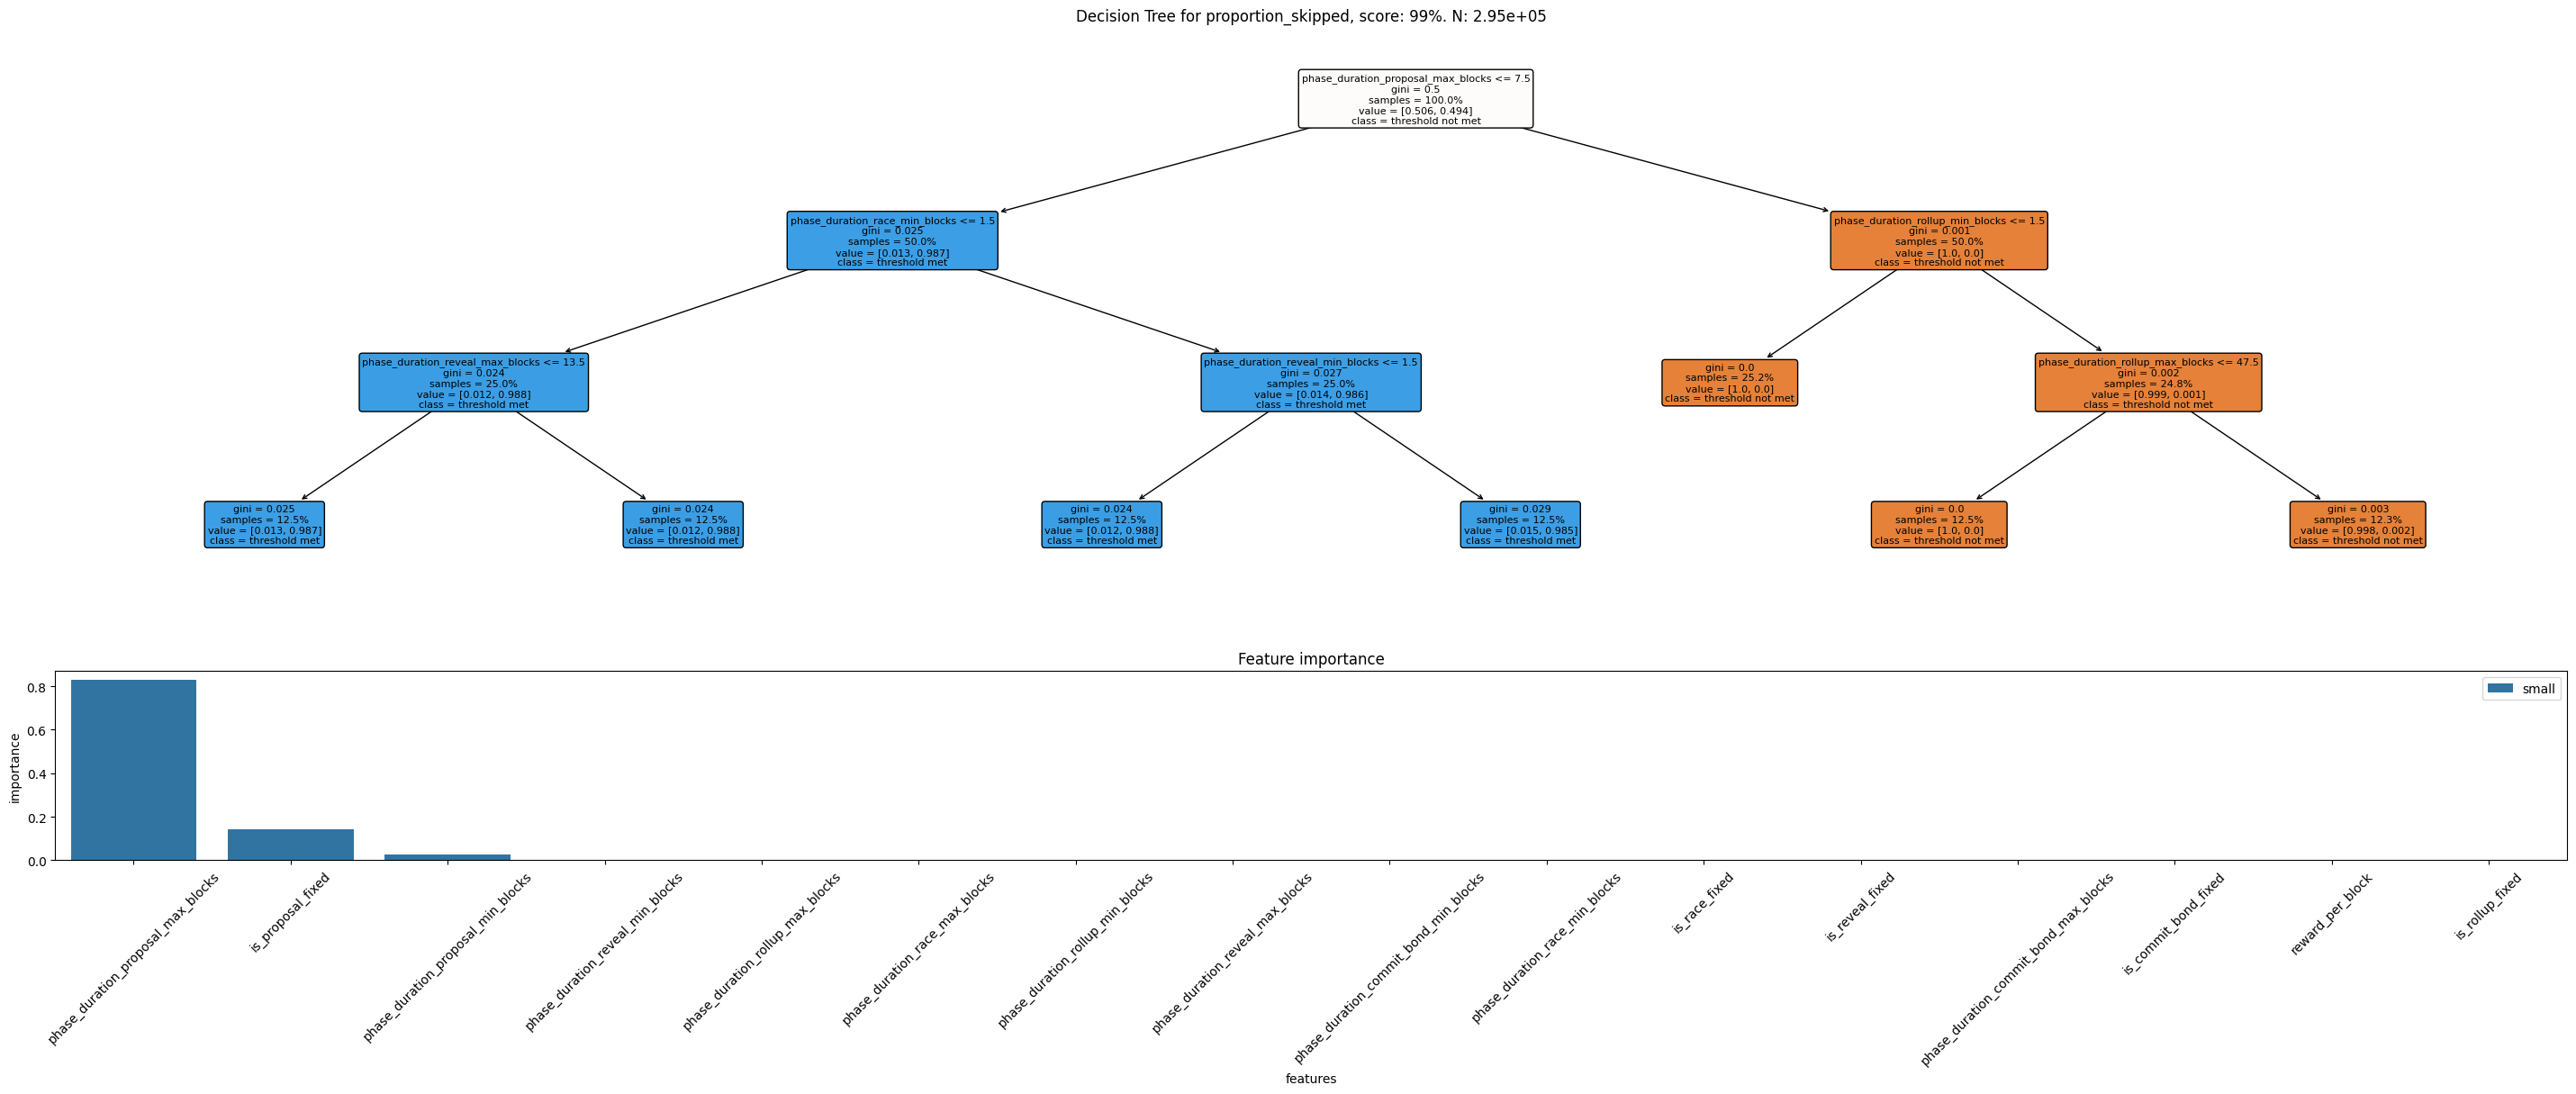

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for proportion_skipped, score: 99%. N: 2.95e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [10]:
create_decision_tree_importances_plot(data = final_G1_df,
                                      col_name = "proportion_skipped")

## Group 2 Tree Importance Plots

In [11]:
goal_number = "G2"
group_name = G2

final_G2_df = calculate_goal_score(grouped_df = base_df,
                    group = group_name,
                    new_column_name = f"{goal_number}_final_score" )

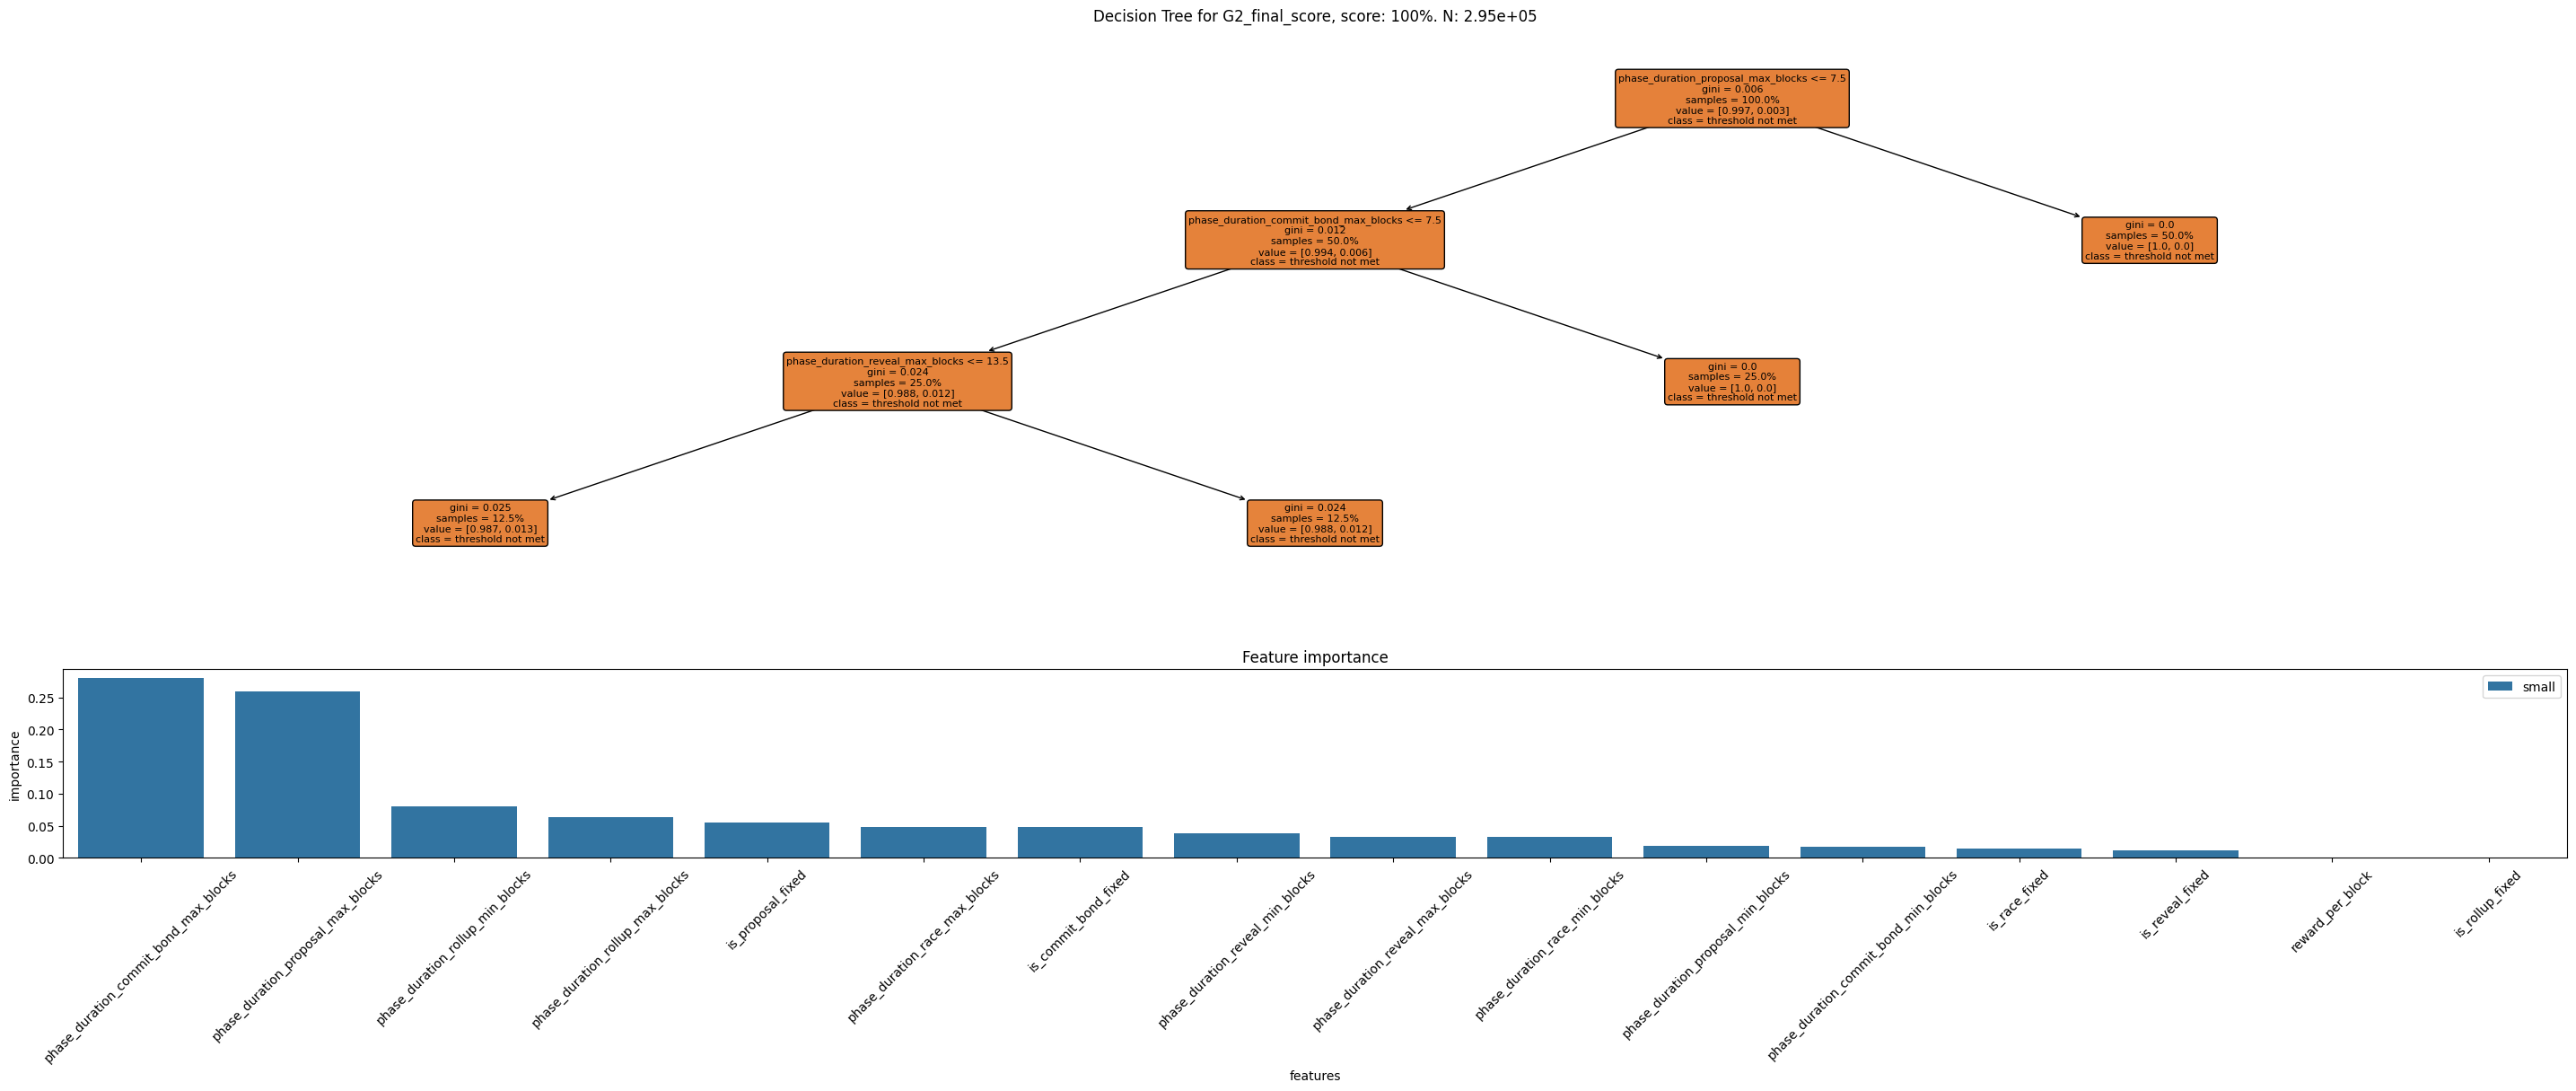

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for G2_final_score, score: 100%. N: 2.95e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [12]:
create_decision_tree_importances_plot(data = final_G2_df, 
                                      col_name = "G2_final_score")

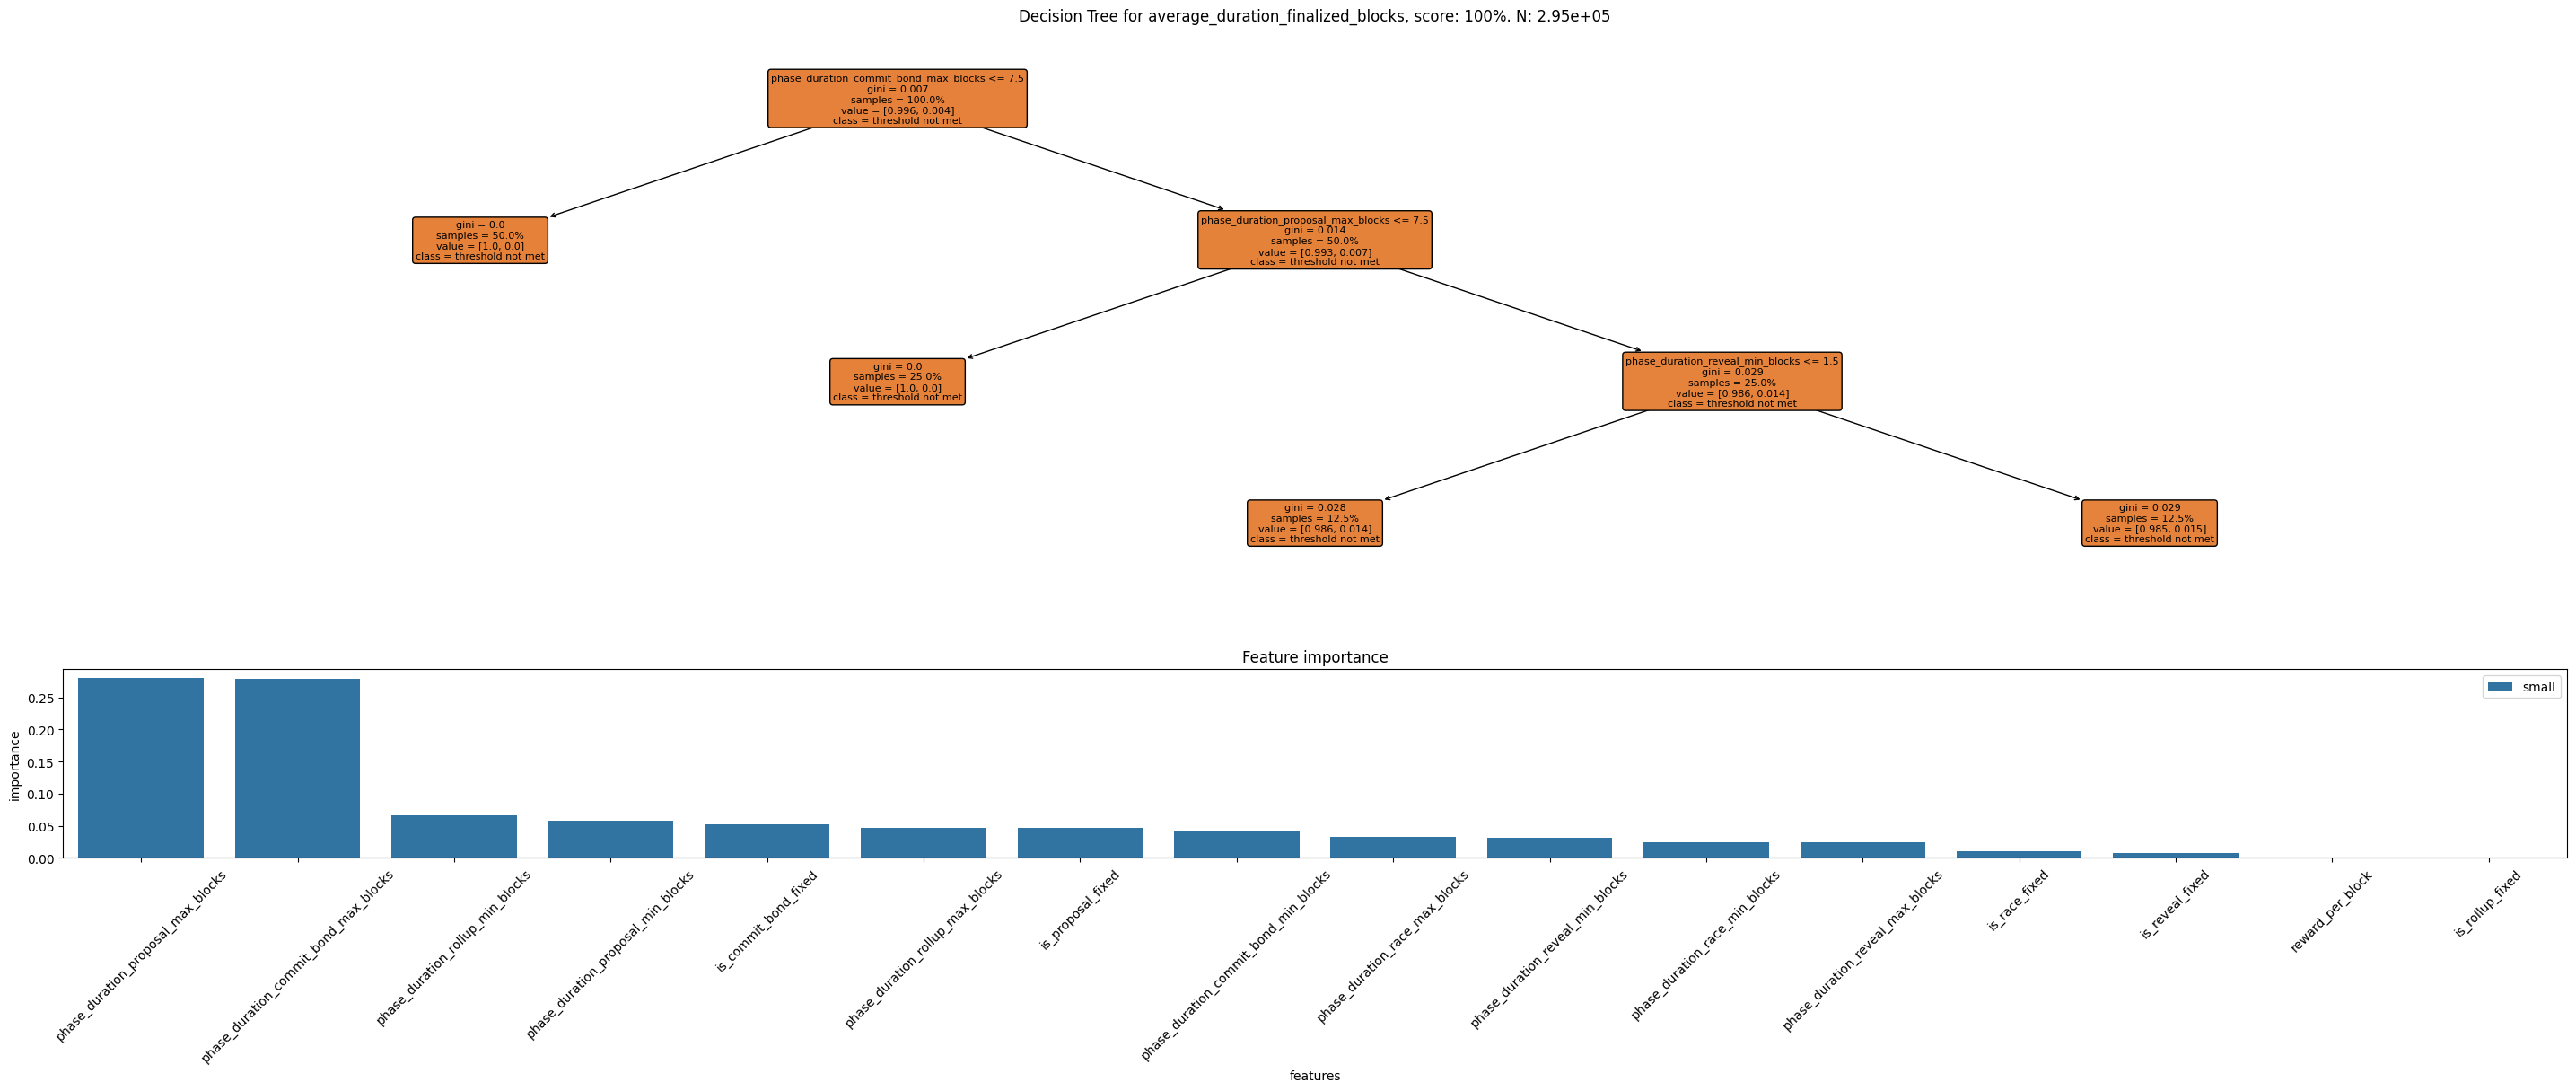

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for average_duration_finalized_blocks, score: 100%. N: 2.95e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [13]:
create_decision_tree_importances_plot(data = final_G2_df,
                                      col_name = "average_duration_finalized_blocks")

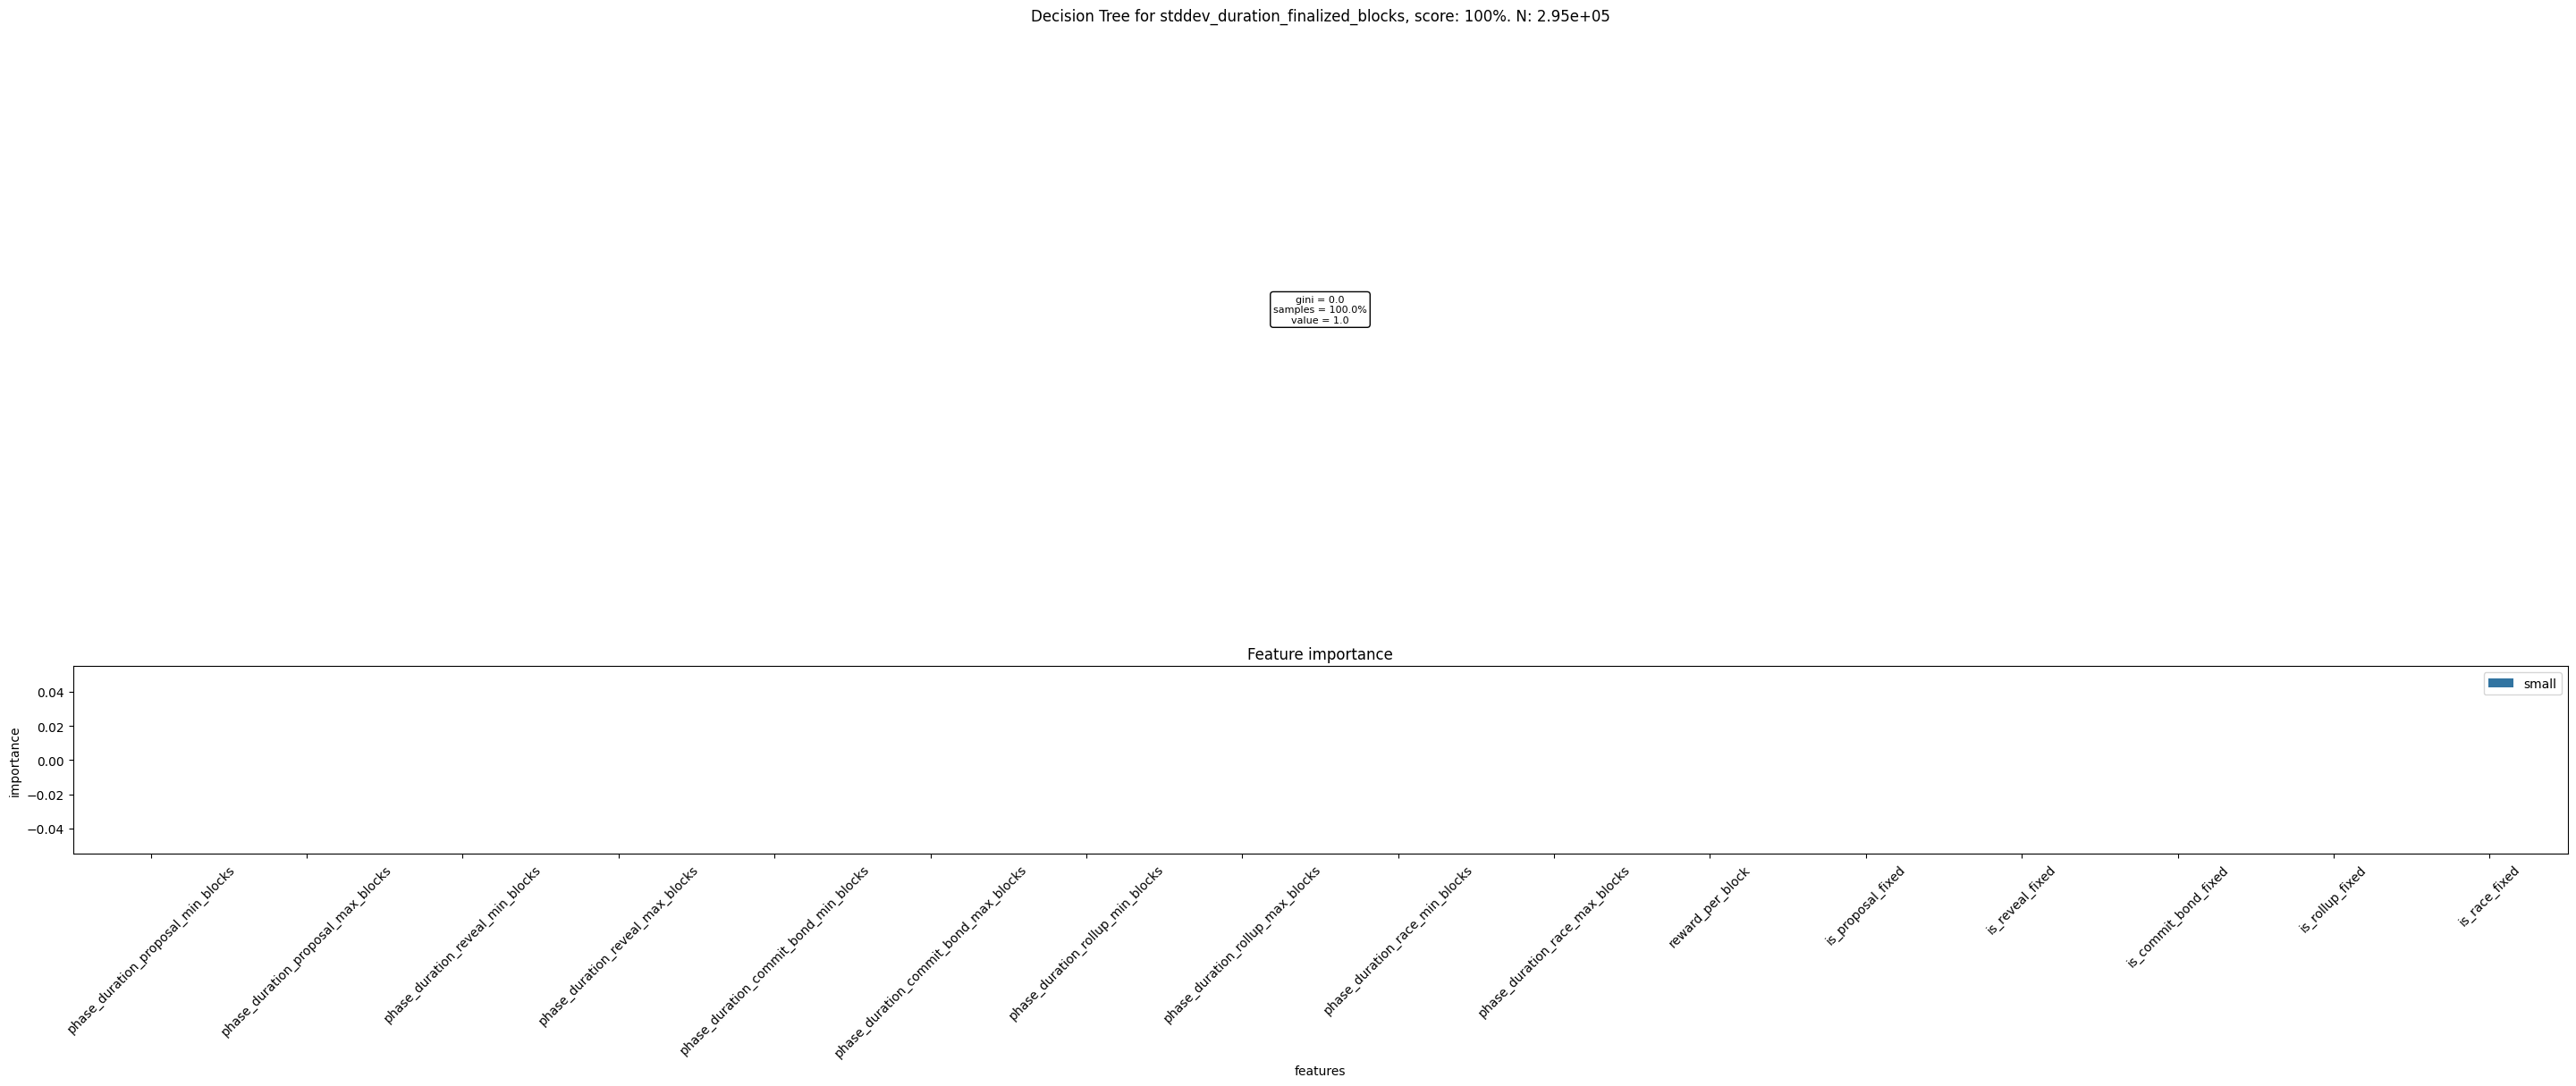

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for stddev_duration_finalized_blocks, score: 100%. N: 2.95e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [14]:
create_decision_tree_importances_plot(data = final_G2_df,
                                      col_name = "stddev_duration_finalized_blocks")

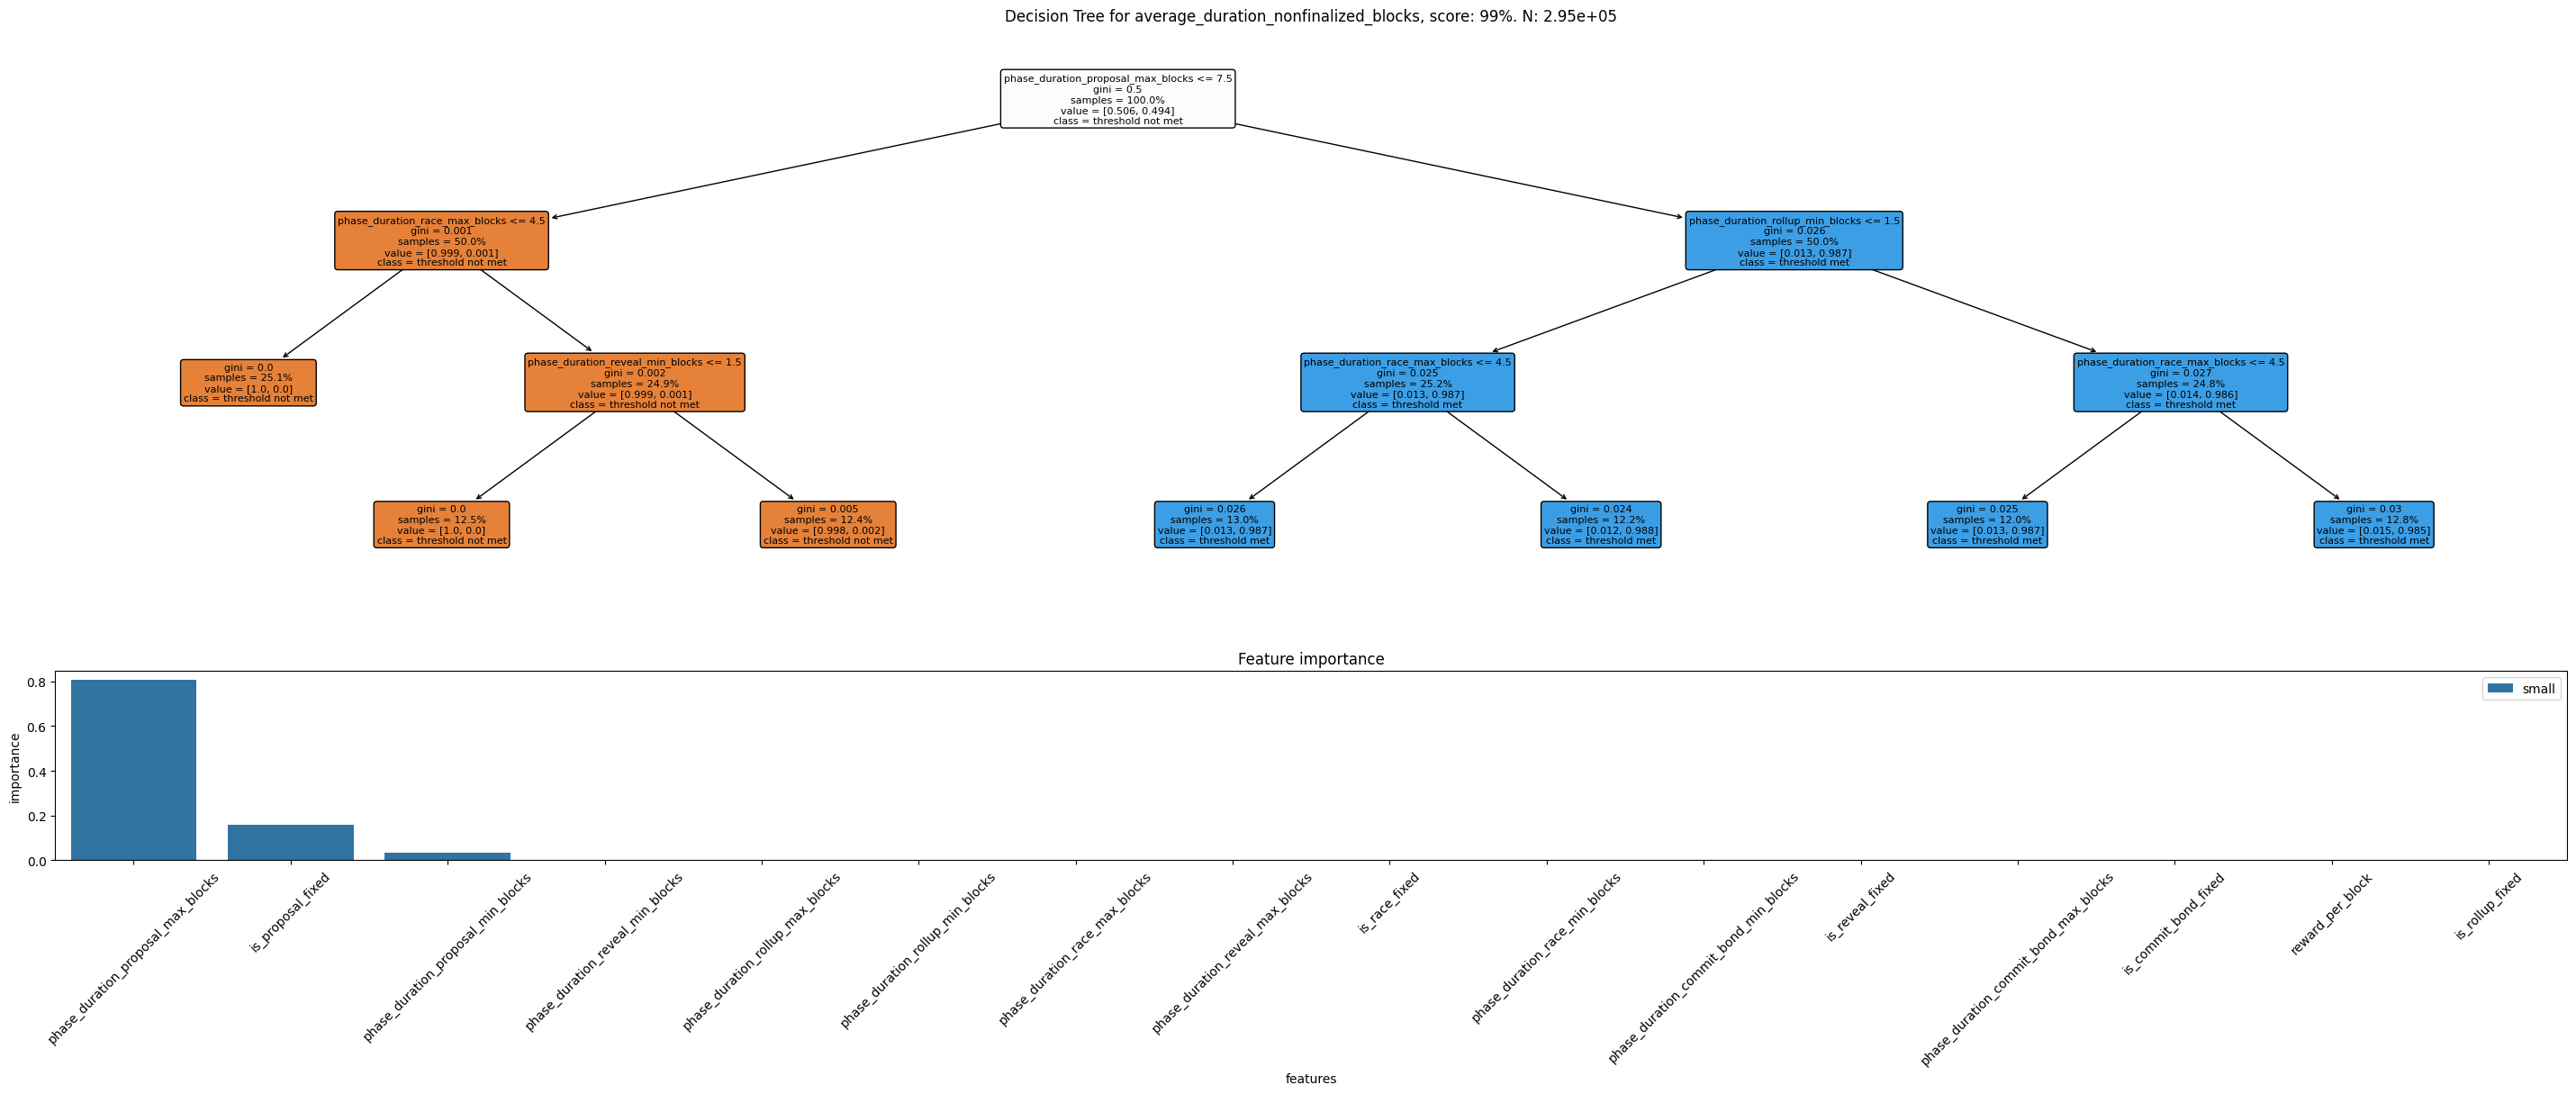

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for average_duration_nonfinalized_blocks, score: 99%. N: 2.95e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [15]:
create_decision_tree_importances_plot(data = final_G2_df,
                                      col_name = "average_duration_nonfinalized_blocks")

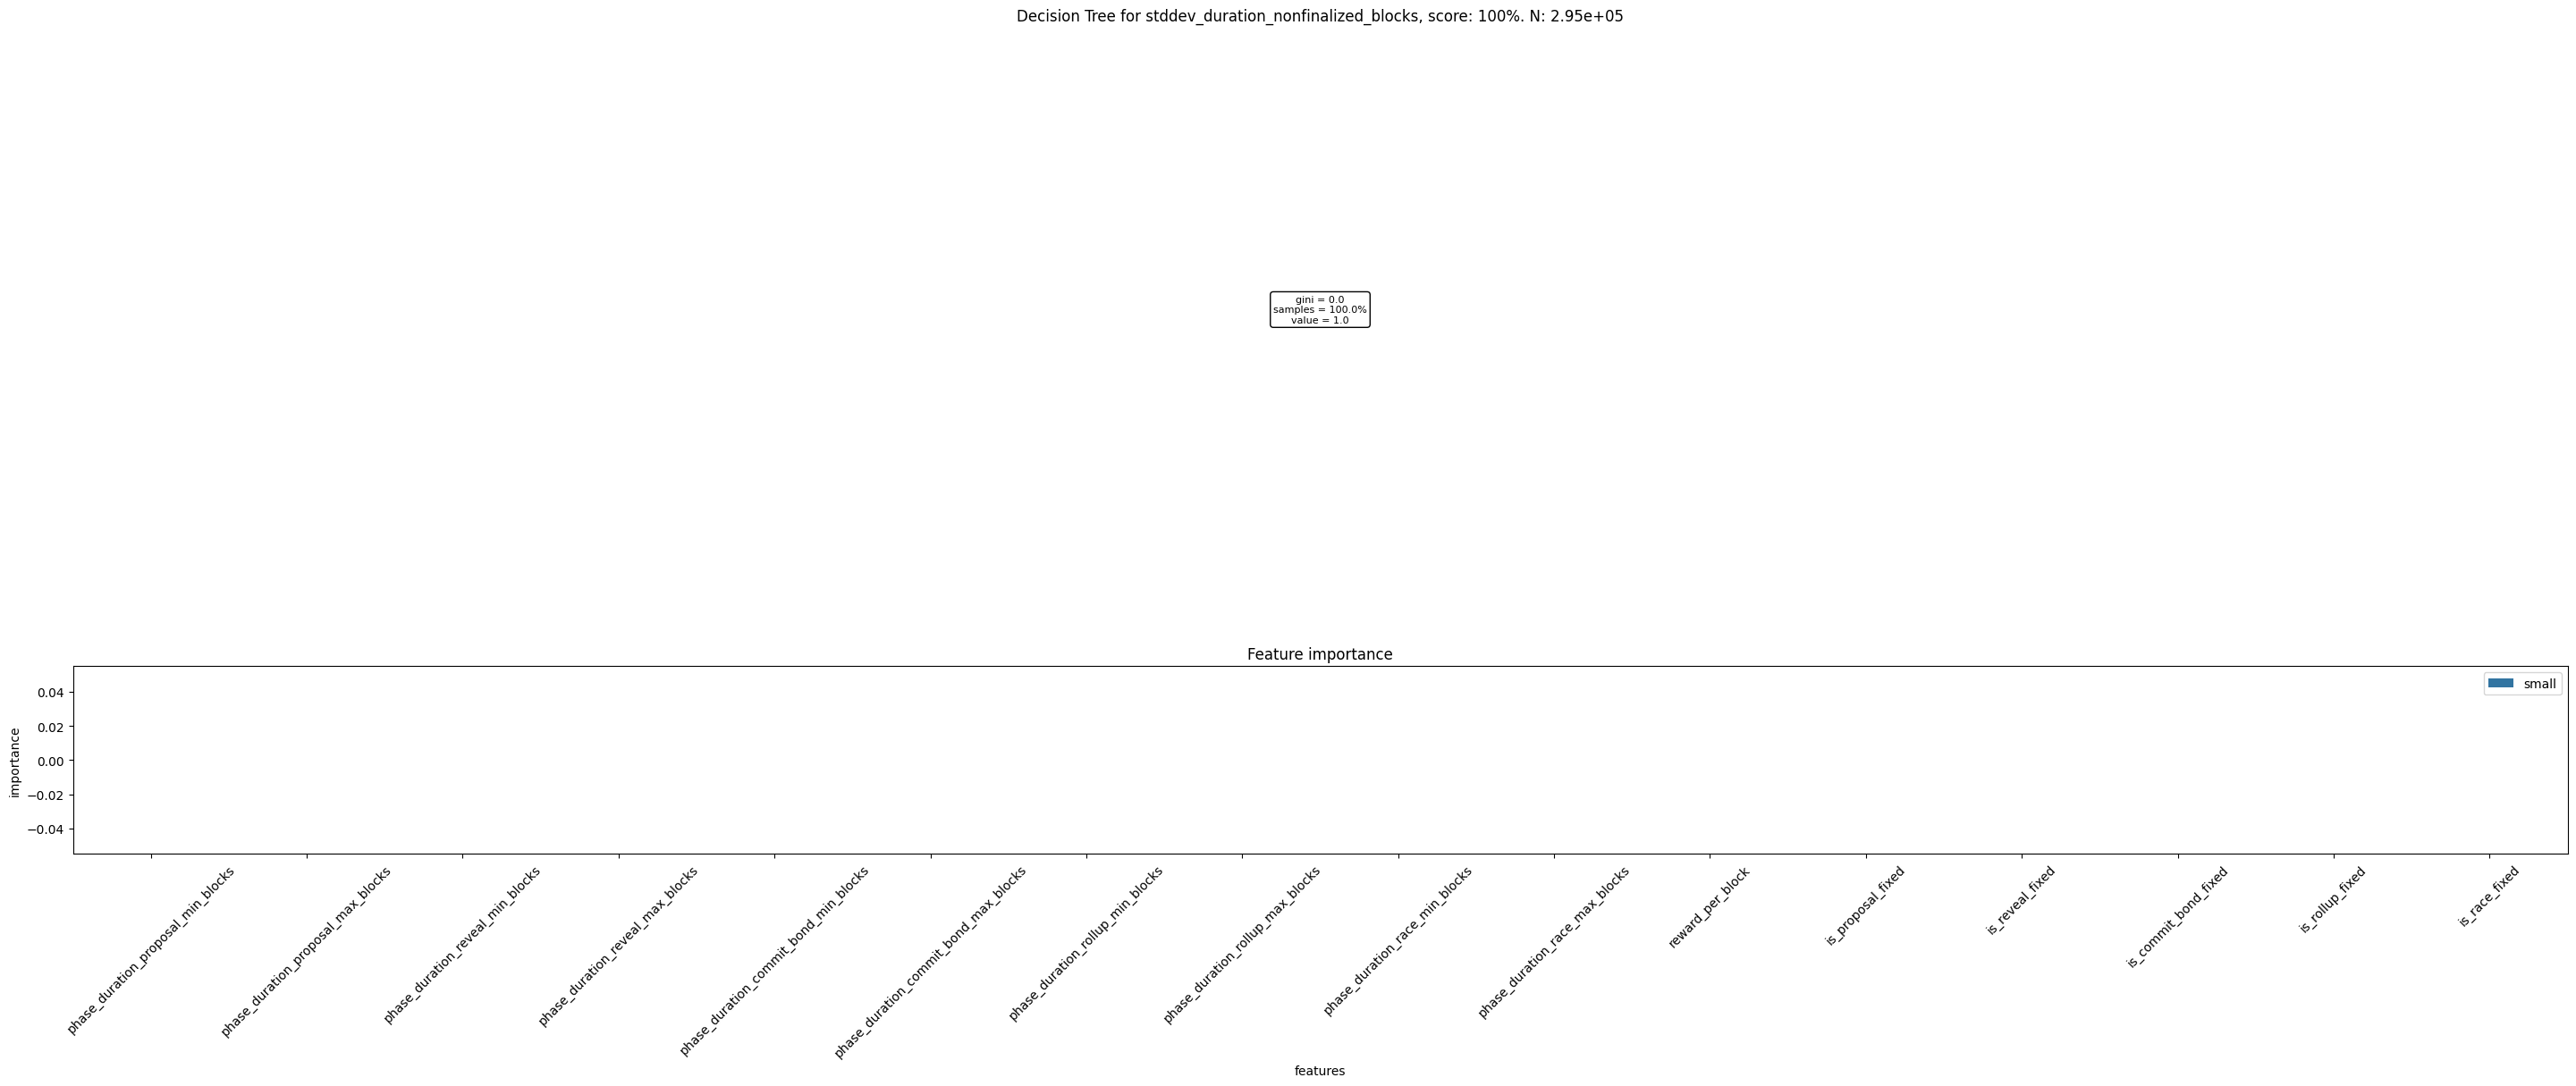

(<Figure size 3600x1200 with 2 Axes>,
 array([<Axes: title={'center': 'Decision Tree for stddev_duration_nonfinalized_blocks, score: 100%. N: 2.95e+05'}>,
        <Axes: title={'center': 'Feature importance'}, xlabel='features', ylabel='importance'>],
       dtype=object))

In [16]:
create_decision_tree_importances_plot(data = final_G2_df,
                                      col_name = "stddev_duration_nonfinalized_blocks")

# Parameter Impact on KPIs

The simulation results provide, for each combination of swept protocol parameter values ("parameter constellations"), a series of outcomes distinguished by different random realizations of stochastic ("Monte Carlo") distributions. Thus, each of the KPIs can be computed for each simulation result, and a _frequency distribution_ or _density_ of KPI values can be generated for each of the iterations of the adaptive grid approach. These densities can be further broken down by protocol parameter value, and the changes in the densities across different values can be visualized. This provides a method of assessing the sensitivity of the KPIs to the protocol parameters, both at the initial adaptive grid implementation, before optimization is performed, and at the end of the implementation, when the recommended parameter ranges have been achieved.

Each group of figures below corresponds to one of the protocol parameters. Each row in a figure group corresponds to a different KPI, and each column to the initial adaptive grid and final adaptive grid simulation results. Within a figure, the density corresponding to each swept value of the associated protocol parameter is presented (generally, the lower sweep value is displayed in black, while the upper sweep value is in red, although this may not always be the case). 

By examining the changes in the shape of the KPI densities across sweep values and across the adaptive grid results, a qualitative visual assessment of how sensitive the KPI under scrutiny is to the swept protocol parameter can be made.

## Parameter Impact Plots, Group 1

### Impact of Parameter Values on `proportion_race_mode` and `proportion_skipped`

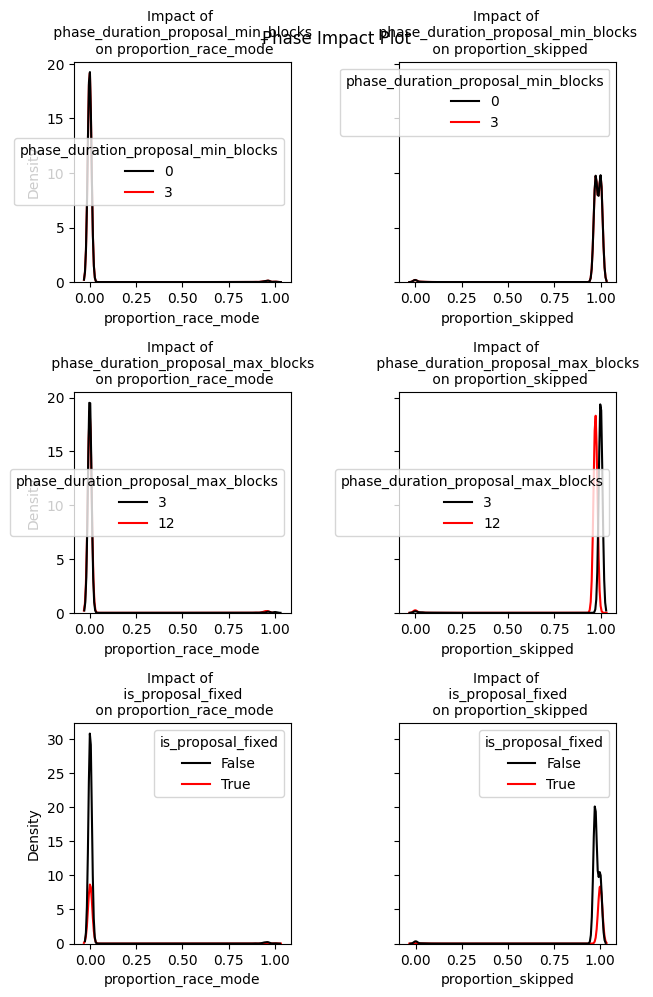

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_proposal_fixed \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_proposal_fixed \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>]],
       dtype=object))

In [17]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "proposal",
                                      kpi_cols = ["proportion_race_mode","proportion_skipped"])


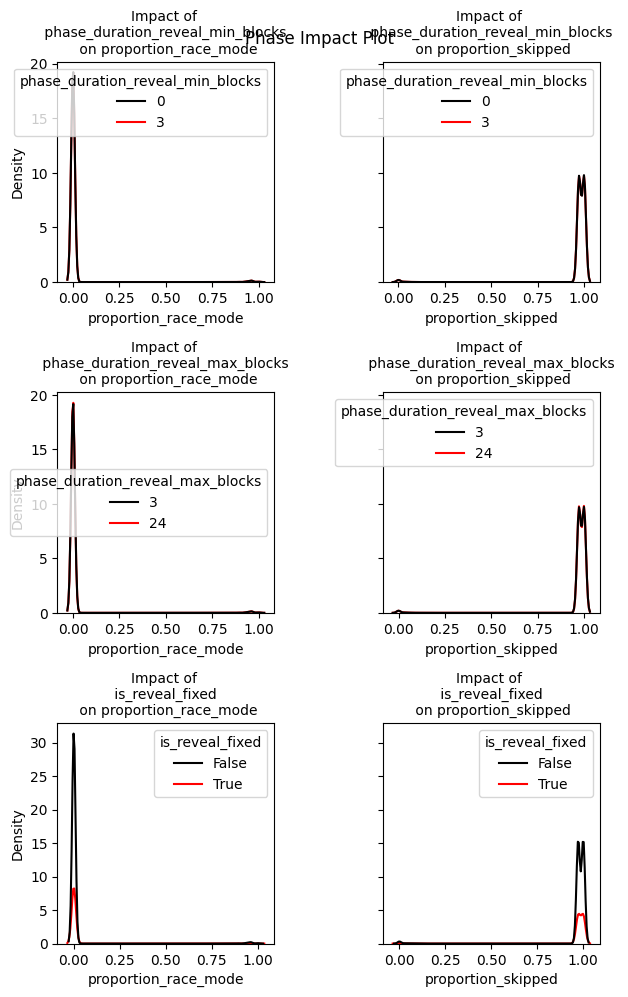

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_reveal_max_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_max_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_reveal_fixed \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_reveal_fixed \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>]],
       dtype=object))

In [18]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "reveal",
                                      kpi_cols = ["proportion_race_mode","proportion_skipped"])

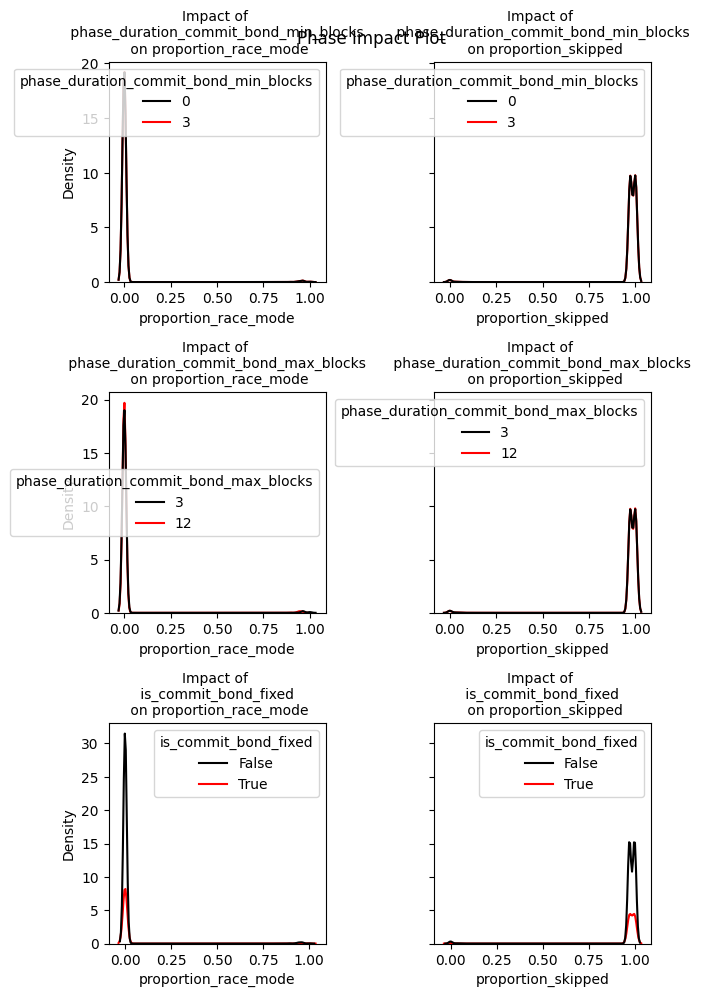

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_commit_bond_min_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_commit_bond_min_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_commit_bond_max_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_commit_bond_max_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_commit_bond_fixed \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_commit_bond_fixed \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>]],
       dtype=ob

In [19]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "commit_bond",
                                      kpi_cols = ["proportion_race_mode","proportion_skipped"])

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(


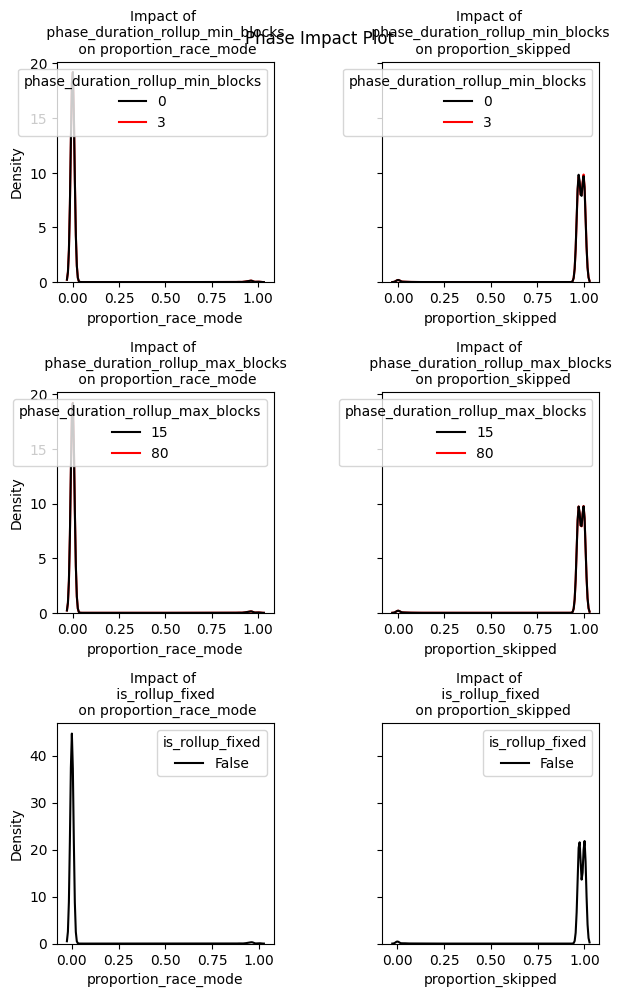

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_rollup_min_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_rollup_min_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_rollup_max_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_rollup_max_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_rollup_fixed \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_rollup_fixed \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>]],
       dtype=object))

In [20]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "rollup",
                                      kpi_cols = ["proportion_race_mode","proportion_skipped"])

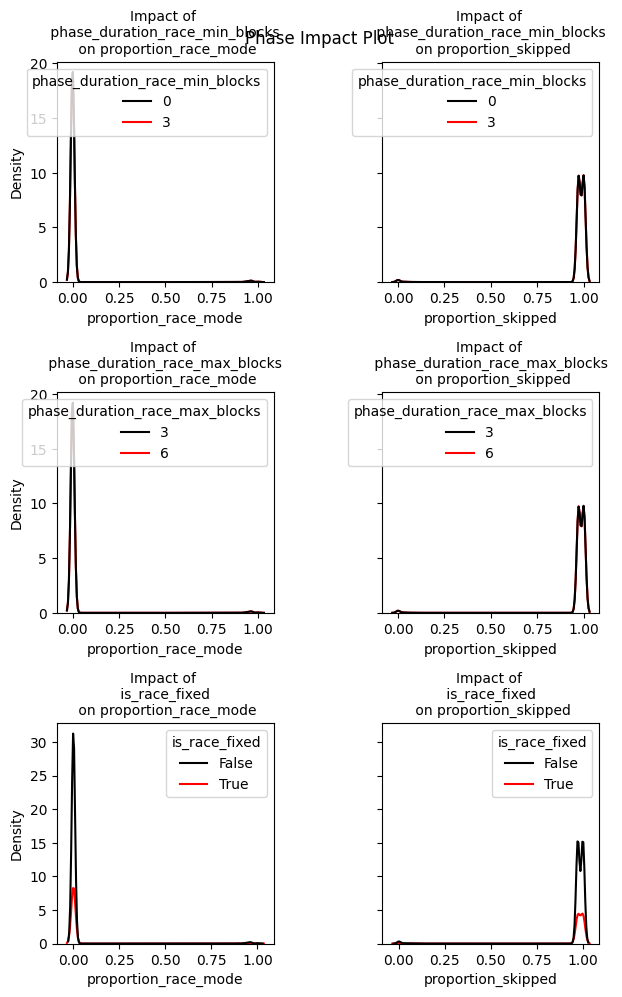

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_race_min_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_race_min_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_race_max_blocks \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_race_max_blocks \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_race_fixed \n on proportion_race_mode'}, xlabel='proportion_race_mode', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_race_fixed \n on proportion_skipped'}, xlabel='proportion_skipped', ylabel='Density'>]],
       dtype=object))

In [21]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "race",
                                      kpi_cols = ["proportion_race_mode","proportion_skipped"])

### Impact of Parameter Values on `proportion_slashed_prover` and `proportion_slashed_sequencer`

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


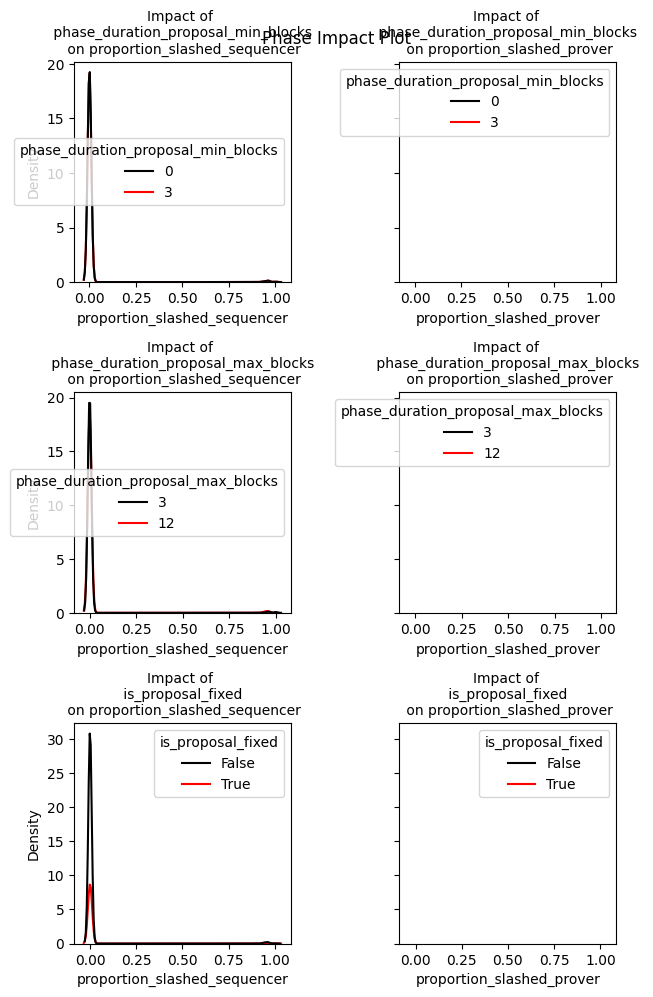

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_proposal_fixed \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_proposal_fixed \n on proportion_slashed_prover'}, 

In [22]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "proposal",
                                      kpi_cols = ["proportion_slashed_sequencer",
                                                  "proportion_slashed_prover"])

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


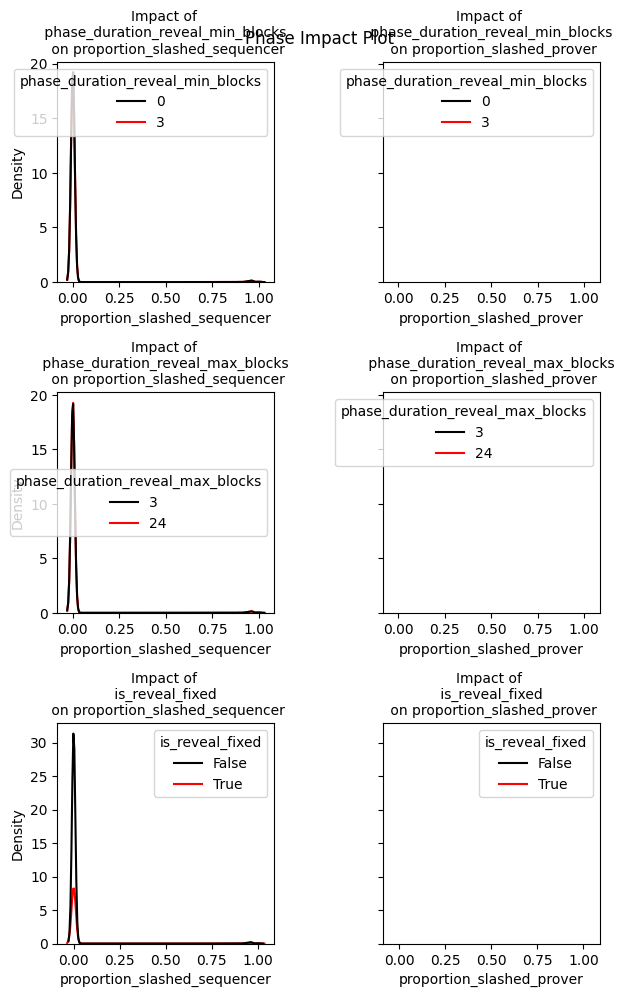

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_reveal_max_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_max_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_reveal_fixed \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_reveal_fixed \n on proportion_slashed_prover'}, xlabel='prop

In [23]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "reveal",
                                      kpi_cols = ["proportion_slashed_sequencer",
                                                  "proportion_slashed_prover"])

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


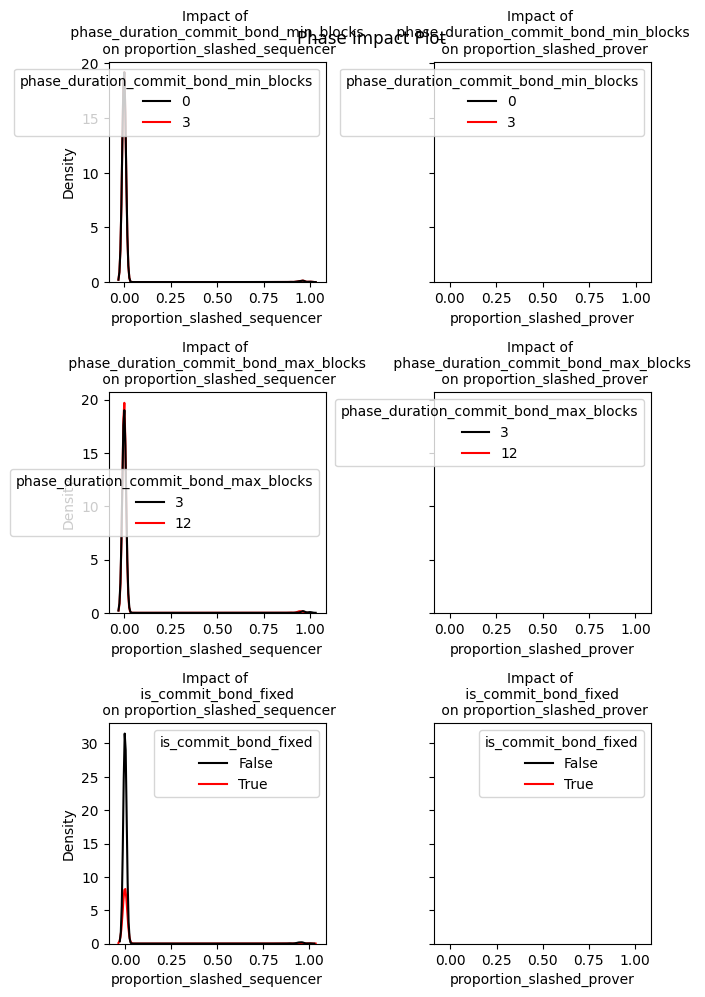

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_commit_bond_min_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_commit_bond_min_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_commit_bond_max_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_commit_bond_max_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_commit_bond_fixed \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_commit_bond_fixed \n on proportion_

In [24]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "commit_bond",
                                      kpi_cols = ["proportion_slashed_sequencer",
                                                  "proportion_slashed_prover"])

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


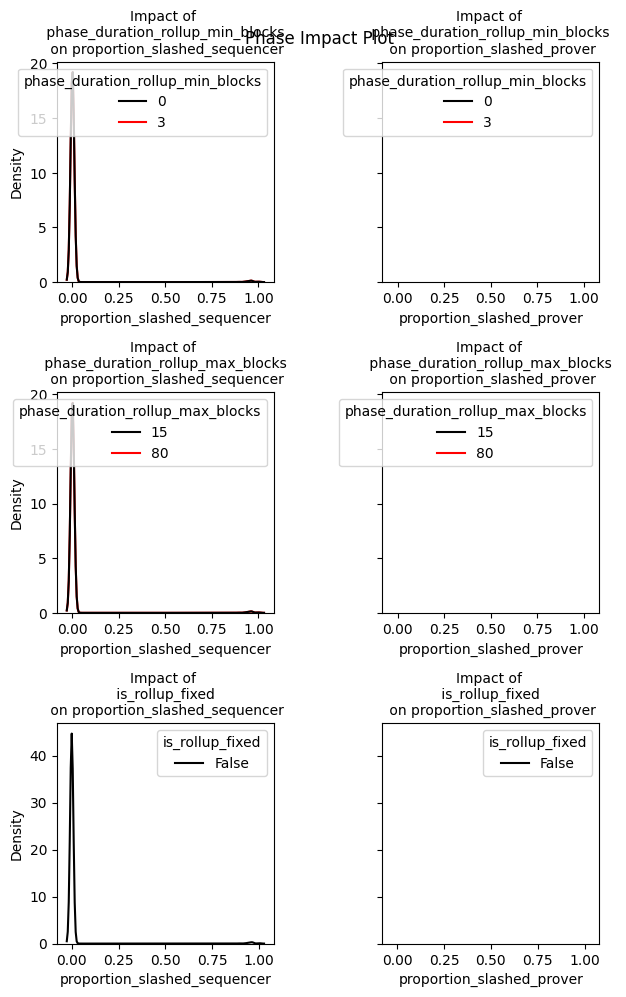

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_rollup_min_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_rollup_min_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_rollup_max_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_rollup_max_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_rollup_fixed \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_rollup_fixed \n on proportion_slashed_prover'}, xlabel='prop

In [25]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "rollup",
                                      kpi_cols = ["proportion_slashed_sequencer",
                                                  "proportion_slashed_prover"])

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


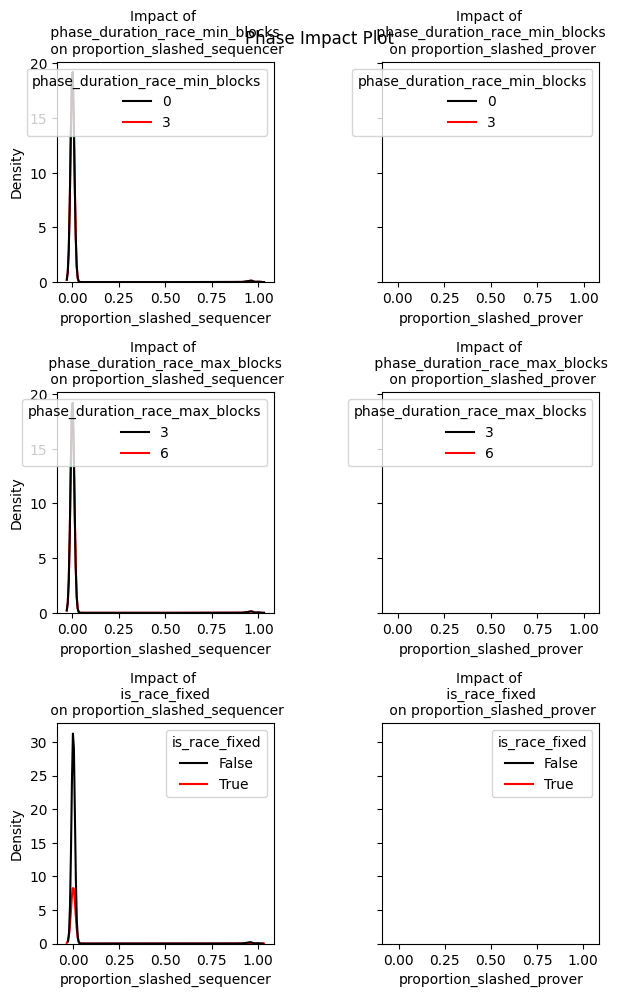

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_race_min_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_race_min_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_race_max_blocks \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_race_max_blocks \n on proportion_slashed_prover'}, xlabel='proportion_slashed_prover', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_race_fixed \n on proportion_slashed_sequencer'}, xlabel='proportion_slashed_sequencer', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_race_fixed \n on proportion_slashed_prover'}, xlabel='proportion_slash

In [26]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "race",
                                      kpi_cols = ["proportion_slashed_sequencer",
                                                  "proportion_slashed_prover"])

## Parameter Impact Plots, Group 2

### Impact of Parameter Values on `average_duration_finalized_blocks` and `stddev_duration_finalized_blocks`

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


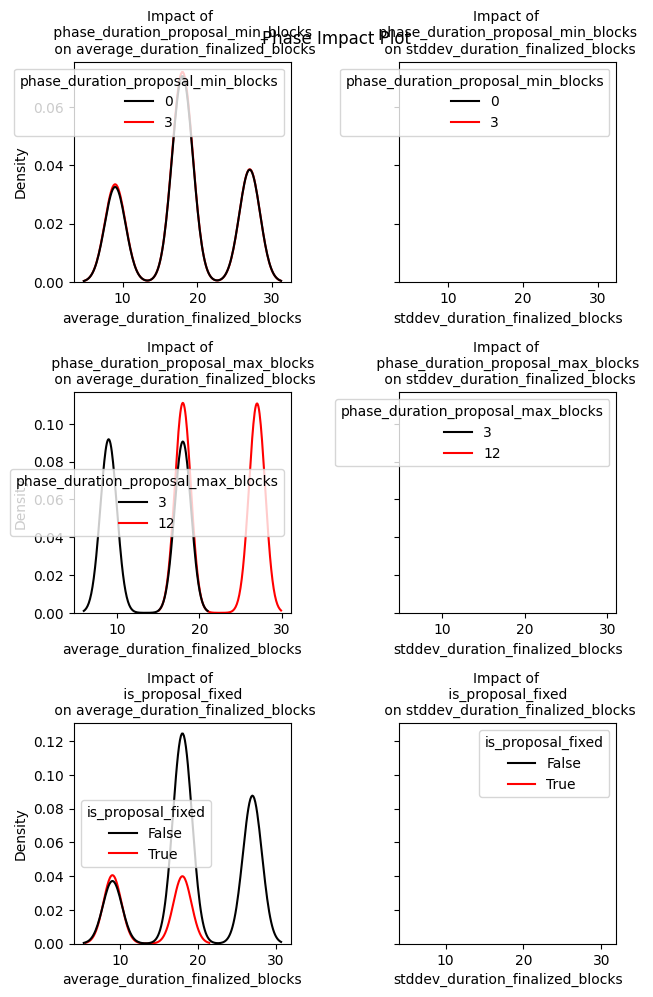

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_proposal_fixed \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact o

In [27]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "proposal",
                                      kpi_cols = ["average_duration_finalized_blocks",
                                                  "stddev_duration_finalized_blocks"])

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


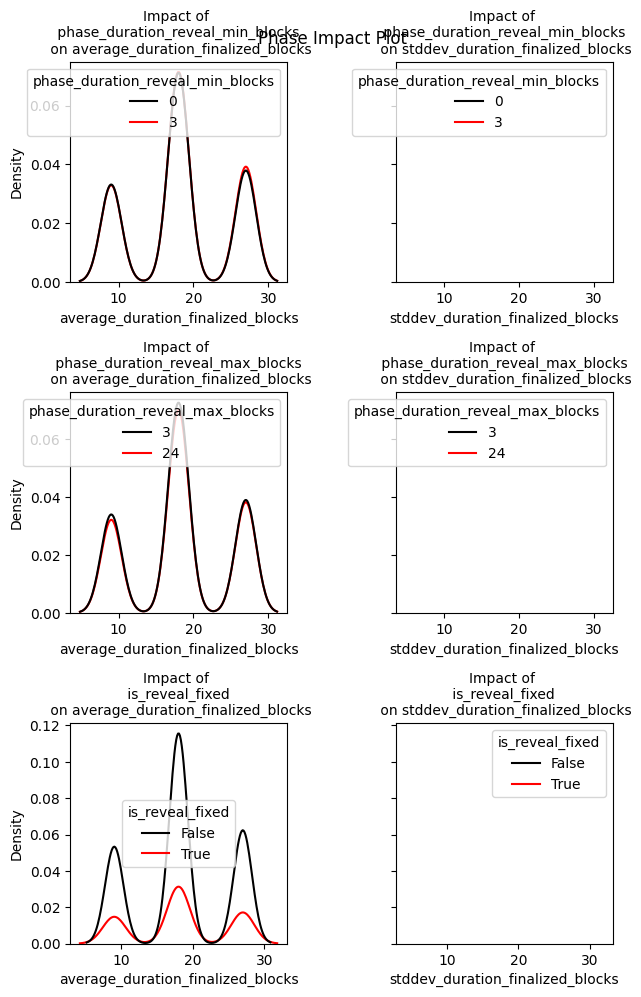

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_reveal_max_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_max_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_reveal_fixed \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_re

In [28]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "reveal",
                                      kpi_cols = ["average_duration_finalized_blocks",
                                                  "stddev_duration_finalized_blocks"])

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


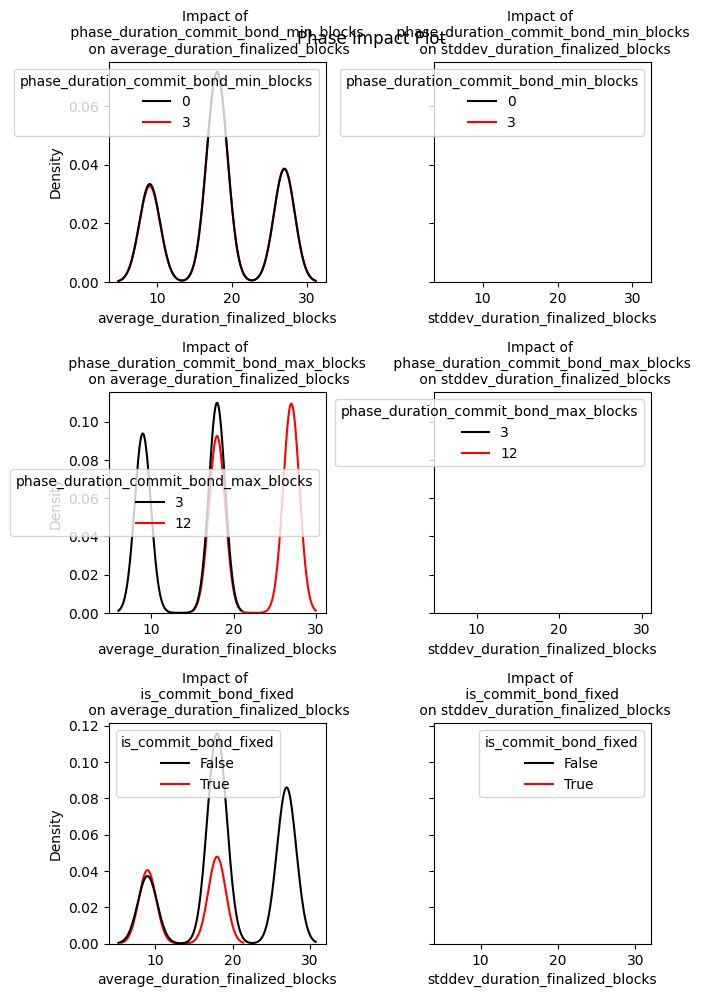

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_commit_bond_min_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_commit_bond_min_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_commit_bond_max_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_commit_bond_max_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_commit_bond_fixed \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'cen

In [29]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "commit_bond",
                                      kpi_cols = ["average_duration_finalized_blocks",
                                                  "stddev_duration_finalized_blocks"])

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


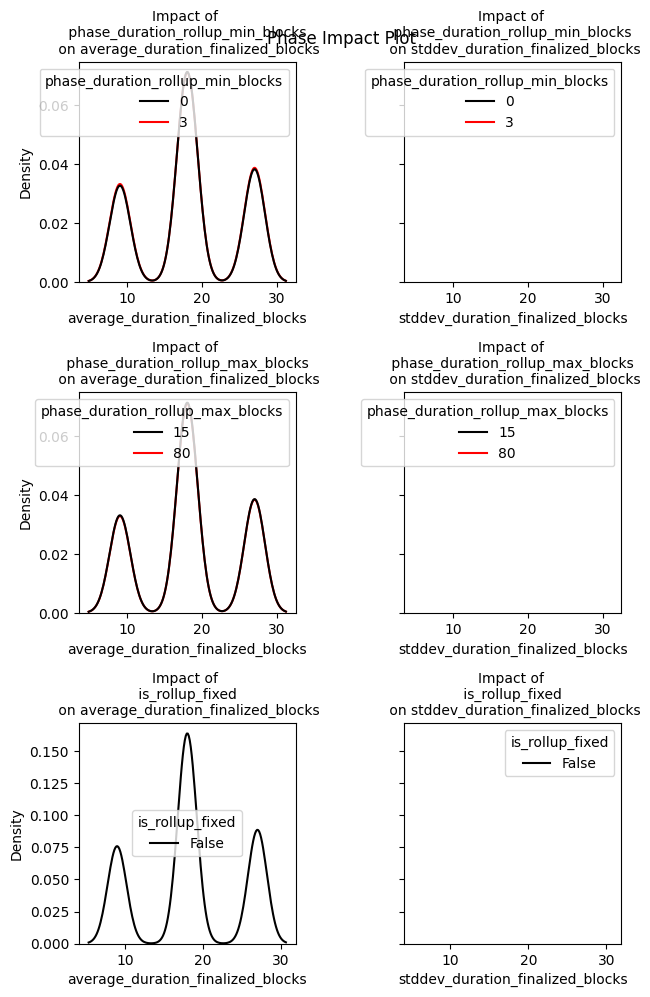

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_rollup_min_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_rollup_min_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_rollup_max_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_rollup_max_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_rollup_fixed \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_ro

In [30]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "rollup",
                                      kpi_cols = ["average_duration_finalized_blocks",
                                                  "stddev_duration_finalized_blocks"])

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


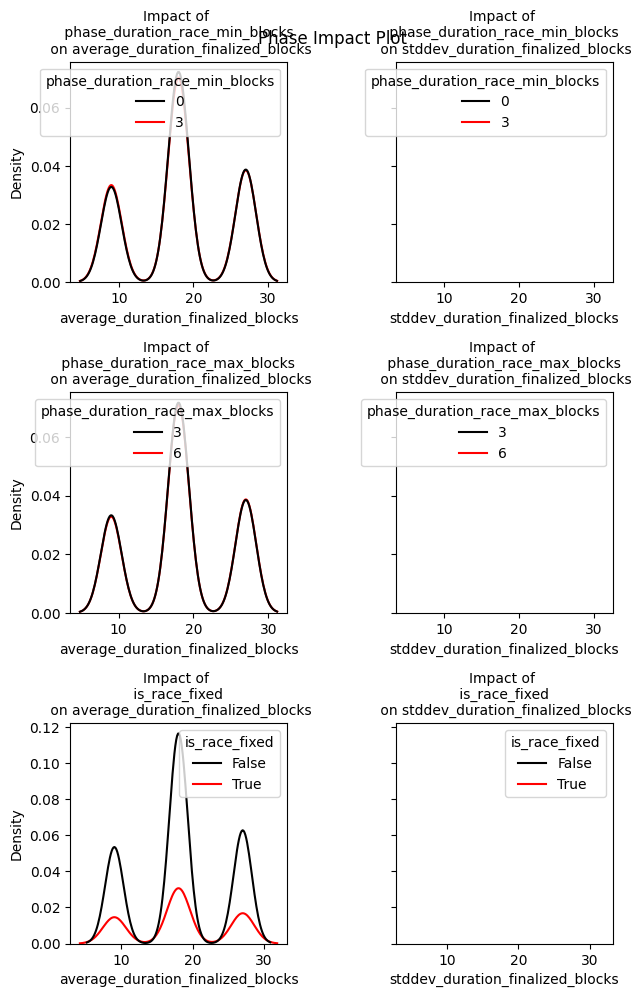

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_race_min_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_race_min_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_race_max_blocks \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_race_max_blocks \n on stddev_duration_finalized_blocks'}, xlabel='stddev_duration_finalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_race_fixed \n on average_duration_finalized_blocks'}, xlabel='average_duration_finalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n is_race_fixed \

In [31]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "race",
                                      kpi_cols = ["average_duration_finalized_blocks",
                                                  "stddev_duration_finalized_blocks"])

### Impact of Parameter Values on `average_duration_nonfinalized_blocks` and `stddev_duration_nonfinalized_blocks`

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


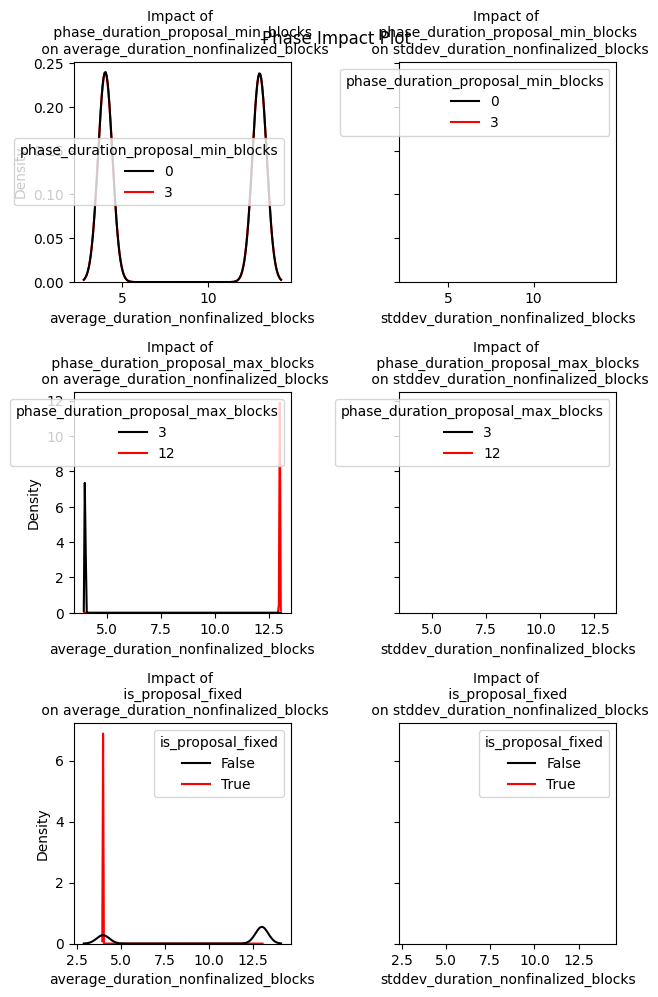

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_min_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_proposal_max_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_proposal_fixed \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Ax

In [32]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "proposal",
                                      kpi_cols = ["average_duration_nonfinalized_blocks",
                                                  "stddev_duration_nonfinalized_blocks"])

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


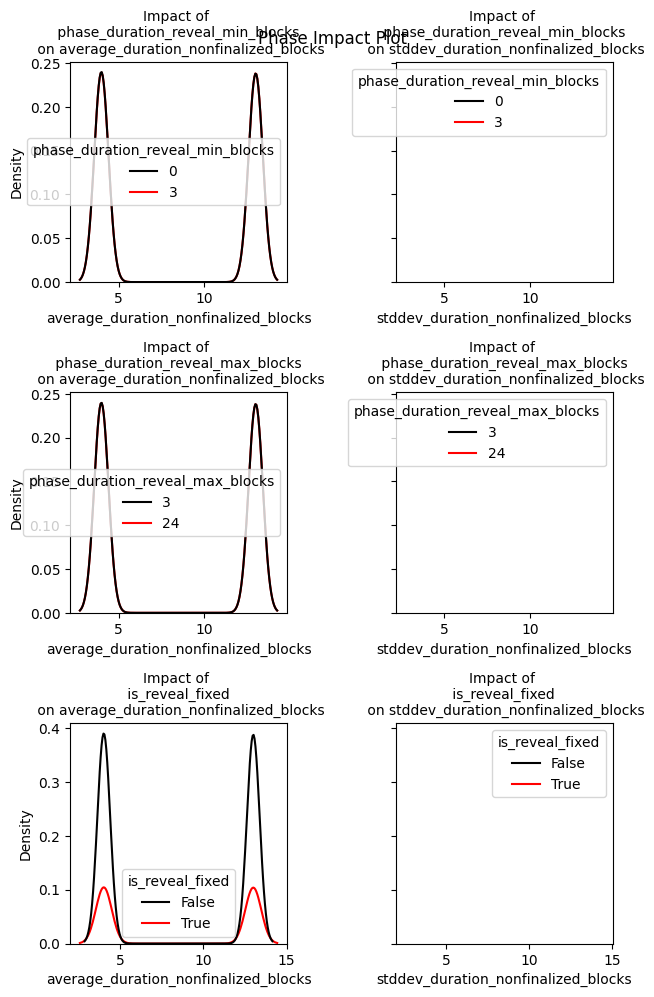

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_min_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_reveal_max_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_reveal_max_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_reveal_fixed \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title=

In [33]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "reveal",
                                      kpi_cols = ["average_duration_nonfinalized_blocks",
                                                  "stddev_duration_nonfinalized_blocks"])

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


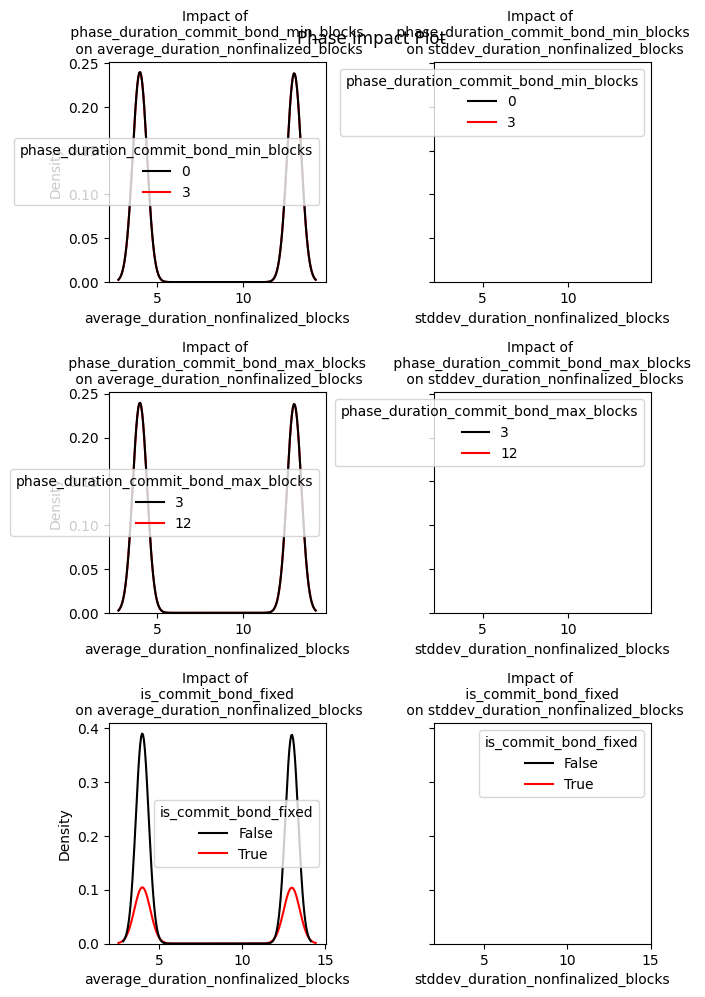

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_commit_bond_min_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_commit_bond_min_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_commit_bond_max_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_commit_bond_max_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_commit_bond_fixed \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'

In [34]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "commit_bond",
                                      kpi_cols = ["average_duration_nonfinalized_blocks",
                                                  "stddev_duration_nonfinalized_blocks"])

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


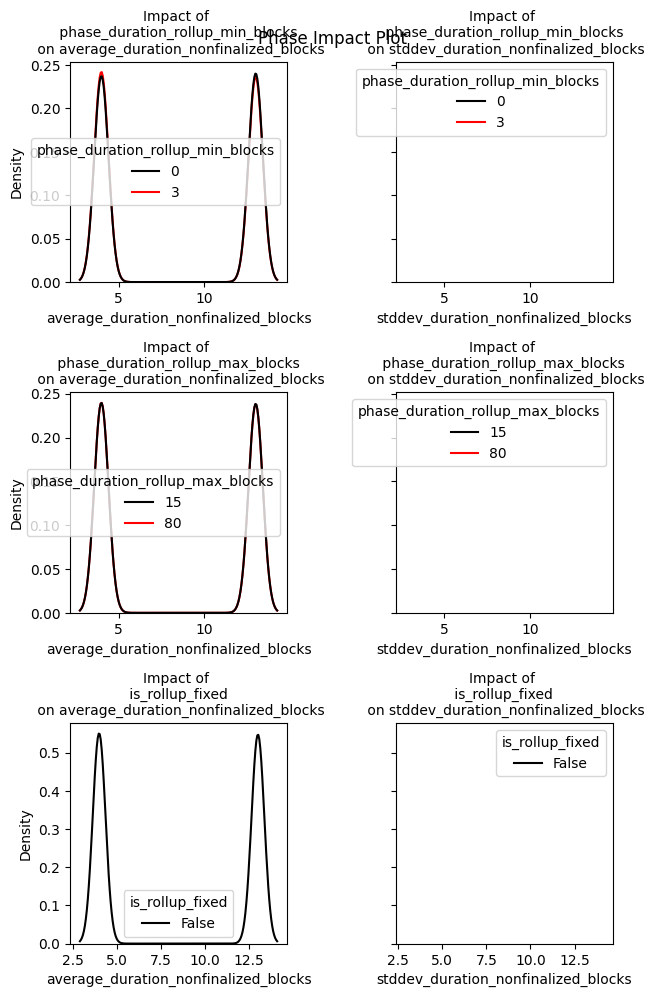

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_rollup_min_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_rollup_min_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_rollup_max_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_rollup_max_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_rollup_fixed \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title=

In [35]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "rollup",
                                      kpi_cols = ["average_duration_nonfinalized_blocks",
                                                  "stddev_duration_nonfinalized_blocks"])

c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
c:\Users\andre\Desktop\aztec-gddt\aztec_gddt\plot_tools.py:165: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


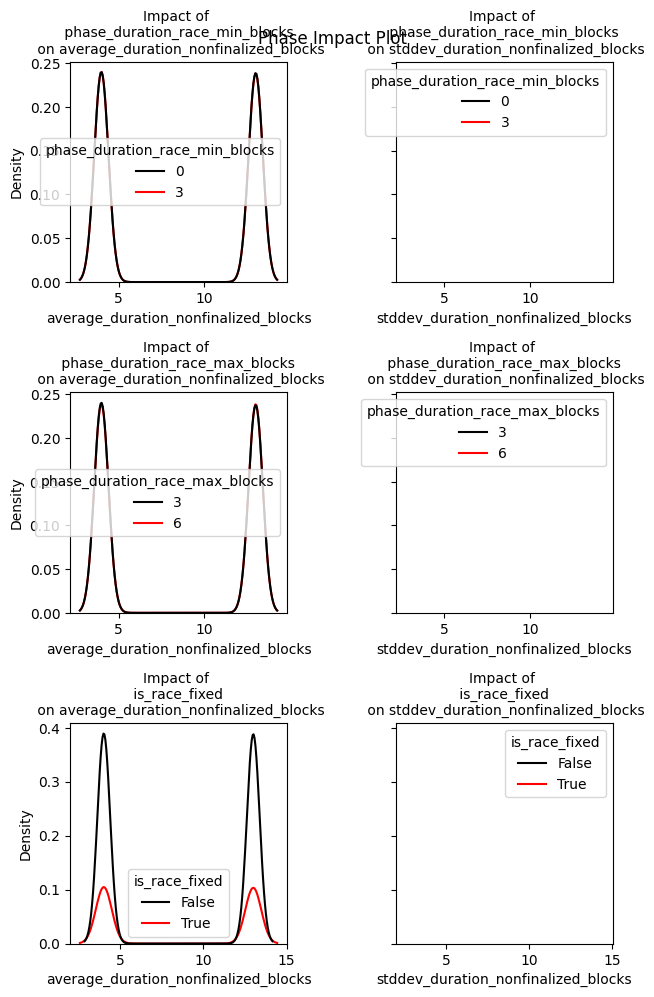

(<Figure size 700x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'Impact of \n phase_duration_race_min_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_race_min_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n phase_duration_race_max_blocks \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center': 'Impact of \n phase_duration_race_max_blocks \n on stddev_duration_nonfinalized_blocks'}, xlabel='stddev_duration_nonfinalized_blocks', ylabel='Density'>],
        [<Axes: title={'center': 'Impact of \n is_race_fixed \n on average_duration_nonfinalized_blocks'}, xlabel='average_duration_nonfinalized_blocks', ylabel='Density'>,
         <Axes: title={'center':

In [36]:
create_phase_impact_dist_plots_by_kpi(df_to_use = base_df,
                                      phase = "race",
                                      kpi_cols = ["average_duration_nonfinalized_blocks",
                                                  "stddev_duration_nonfinalized_blocks"])